In [ ]:
!apt-get install libomp5
!apt-get install libopenblas-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libomp5-14
The following NEW packages will be installed:
  libomp5 libomp5-14
0 upgraded, 2 newly installed, 0 to remove and 19 not upgraded.
Need to get 392 kB of archives.
After this operation, 2,413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp5-14 amd64 1:14.0.0-1ubuntu1.1 [389 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libomp5 amd64 1:14.0-55~exp2 [3,060 B]
Fetched 392 kB in 0s (3,811 kB/s)
Selecting previously unselected package libomp5-14:amd64.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../libomp5-14_1%3a14.0.0-1ubuntu1.1_amd64.deb ...
Unpacking libomp5-14:amd64 (1:14.0.0-1ubuntu1.1) ...
Selecting previously unselected package libomp5:amd64.
Preparing to unpack .../libomp5_1%3a14.0-55~exp

In [ ]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 62.0 MB/s eta 0:00:00


In [ ]:
import faiss

In [1]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

# Dealing with Few to No Labels

At the start of every project, the first question any data scientist asks? Is there any labelled data? Answer's mostly no or little bit. And on top of client's expectation that our fancy machine learning models should still perform well. One obvious apporach is annotate more data, but this is more expensive if each annotation has to be validated by a domain expert.

Fortunaley there are several methods that are suited for dealing with few to no labels. Like *Zero-shot* in GPT-3 where it perfoms over a diverse range of tasks with a few dozen examples.

In general, the best-performing method will depend upon task, data, how much of the data is labeled.

*The below picture will guide us through the process of picking the most appropriate method*
![alt](https://github.com/JpChii/nlp-with-hugging-face/blob/main/notes/images/9-dealing-with-few-to-no-labels/technqiques-to-deal-with-less-to-no-labelled-data.png?raw=1)

Let's walk through this decision tree:

1. Is labeld data available?

Evan a handful of labeled of labeled samples can make a difference with regards to which method works best. If no labeld data is available then we can start with zero-shot learning which often sets a strong baseline to work from.

2. How many labels?

If we lots of labelled training data available then we can use the fine tuning approach used in [notebook 2](../notebooks/2-text-classification.ipynb)

3. Is there unlabeled data available?

If we have a handful of labeled samples it can help immensley if we have access to large amounts ot unlabeled data. If we have access to unlabeled data, we can use it to fine-tune the language model on the domain before training the classifier, or use more sophisticated methods like unsupervised data augmentation(UDA) or uncertainy-aware self-training(UST). If no unlabeled data is available, we can't annotate more data. In this case we can use few-shot learning or use the embeddings from a pretrained language model to perform lookups with a nearest neighbor search.

Int this notebook, we'll work our way through the decision tree by tackling a common problem facing many support teams that use issue trackers like Jira or Github to assist their users: tagging issues with metadata based on the issue's description. These tags define issue type,product causing the issue, responsible team. Automating the process will have an big impact on productivity and enables the support teams to focus on helping the users. In this notebook, we'll use issues associated with a populat open source project: Transformers. Let's now take a look at what information is available in these issues, what is the task and how to get the data.

> **Note:** The methods used in this notebooks will work well for text classification, but other techniques such as data augmentation may be necessary for dealing with more complex tasks like named entity recognition, question answering or summarization.

## Building a Github Issues Tagger

If we navgate to [issues tab](https://github.com/huggingface/transformers/issues) of transformers, we'll have each issues with title, description, set of tags or labels to chracterize the issue. The supervised learning task: given a title, description of an issue, predict one or more labels, this means we are dealing with multlable classification problem.

*Single issue*
![alt](https://github.com/JpChii/nlp-with-hugging-face/blob/main/notes/images/9-dealing-with-few-to-no-labels/singe-issue.png?raw=1)

Now we've seen how the Github Issues look like, next let's see how to download and create our dataset.

To grab all repository's issues, we'll use the [GitHub REST API](https://docs.github.com/en/rest?apiVersion=2022-11-28) to poll the [Issues endpoint](https://docs.github.com/en/rest/issues#list-repository-issues). This endpoint returns a list of json objects, with each object contatining, issue, title, description, whether issue is open or close, owho opend it etc.

Since it takes a while to fetch all issues, we'll use the *github-issues-transformers-json* file. Along with `fetch_issues()` function to download them.

> **Note:** The GitHub REST API treats pull requests as issues, so our dataset contains both issues and pull requests. To keep things simple. we'' develop our classifier for both issue types, althoug in practice we can have two seperated classifiers to have more fine-grained control over the model's performance.

In [2]:
import time
import math
import requests
from pathlib import Path
import pandas as pd
from tqdm.auto import tqdm

def fetch_issues(
    owner="huggingface",
    repo="transformers",
    num_issues=10_000,
    rate_limit=5_000,
):
    batch = []
    all_issues = []
    per_page = 100 # Number of issues to return per page
    num_pages = math.ceil(num_issues / per_page)
    base_url = "https://api.github.com/repos"

    for page in tqdm(range(num_pages)):
        query = f"issues?page={page}&per_page={per_page}&state=all"
        issues = requests.get(f"{base_url}/{owner}/{repo}/{query}")
        batch.extend(issues)

        if len(batch) > rate_limit and len(all_issues) < num_issues:
            all_issues.extend(batch)
            batch = [] # Flush batch for next time period
            print(f"Reached Github rate limit. Sleeping for one hour...")
            time.sleep(60 * 60 + 1)
    all_issues.extend(batch)
    df = pd.DataFrrame.from_records(all_issues)
    df.to_json(f"github-issues-{repo}.jsonl", orient="records", lines=True)

This function will download all the issues in batches to avoid exceeding GitHub's limit on number of requests per hour. Let's download the file.

### Preparing the data

In [3]:
import pandas as pd

dataset_url = "https://git.io/nlp-with-transformers"
df_issues = pd.read_json(dataset_url, lines=True)
print(f"DataFrame shape: {df_issues.shape}")

DataFrame shape: (9930, 26)


In [4]:
df_issues

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app,pull_request
0,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849568459,MDU6SXNzdWU4NDk1Njg0NTk=,11046,Potential incorrect application of layer norm ...,...,NaN,0,2021-04-03 03:37:32,2021-04-03 03:37:32,NaT,NONE,None,"In BlenderbotSmallDecoder, layer norm is appl...",NaN,None
1,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849544374,MDU6SXNzdWU4NDk1NDQzNzQ=,11045,Multi-GPU seq2seq example evaluation significa...,...,NaN,0,2021-04-03 00:52:24,2021-04-03 00:52:24,NaT,NONE,None,\r\n### Who can help\r\n@patil-suraj @sgugger ...,NaN,None
2,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849529761,MDU6SXNzdWU4NDk1Mjk3NjE=,11044,[DeepSpeed] ZeRO stage 3 integration: getting ...,...,NaN,0,2021-04-02 23:40:42,2021-04-03 00:00:18,NaT,COLLABORATOR,None,"**[This is not yet alive, preparing for the re...",NaN,None
3,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849499734,MDU6SXNzdWU4NDk0OTk3MzQ=,11043,Can't load model to estimater,...,NaN,0,2021-04-02 21:51:44,2021-04-02 21:51:44,NaT,NONE,None,I was trying to follow the Sagemaker instructi...,NaN,None
4,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849274362,MDU6SXNzdWU4NDkyNzQzNjI=,11042,[LXMERT] Unclear what img_tensorize does with ...,...,NaN,0,2021-04-02 15:12:57,2021-04-02 15:15:07,NaT,NONE,None,## Environment info\r\n\r\n- `transformers` ve...,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/pu...,486208136,MDExOlB1bGxSZXF1ZXN0MzExNzA2NjQ5,1127,DistilBERT,...,NaN,2,2019-08-28 07:34:11,2020-01-09 13:36:31,2019-08-28 14:43:10,MEMBER,None,"Preparing the release for DistilBERT (smaller,...",NaN,{'url': 'https://api.github.com/repos/huggingf...
9926,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,486120054,MDU6SXNzdWU0ODYxMjAwNTQ=,1126,Bert initialization,...,NaN,2,2019-08-28 02:01:59,2019-09-02 06:53:22,2019-09-02 06:53:22,NONE,None,"When I train bert model from scratch, it can n...",NaN,None
9927,https://api.github.com/repos/huggingface/trans...,http

In [5]:
df_issues.iloc[0]

url                         https://api.github.com/repos/huggingface/trans...
repository_url              https://api.github.com/repos/huggingface/trans...
labels_url                  https://api.github.com/repos/huggingface/trans...
comments_url                https://api.github.com/repos/huggingface/trans...
events_url                  https://api.github.com/repos/huggingface/trans...
html_url                    https://github.com/huggingface/transformers/is...
id                                                                  849568459
node_id                                              MDU6SXNzdWU4NDk1Njg0NTk=
number                                                                  11046
title                       Potential incorrect application of layer norm ...
user                        {'login': 'sougata-ub', 'id': 59206549, 'node_...
labels                                                                     []
state                                                           

There are almost 10,000 issues in our dataset, and by looking at df info, we've URLs, IDs, dates, users, title, body as well as labels

In [6]:
# cols needed
cols = ["url", "id", "title", "user", "labels", "state", "created_at", "body"]
df_issues.loc[2, cols].to_frame()

,2
url,https://api.github.com/repos/huggingface/trans...
id,849529761
title,[DeepSpeed] ZeRO stage 3 integration: getting ...
user,"{'login': 'stas00', 'id': 10676103, 'node_id':..."
labels,"[{'id': 2659267025, 'node_id': 'MDU6TGFiZWwyNj..."
state,open
created_at,2021-04-02 23:40:42
body,"**[This is not yet alive, preparing for the re..."


In [7]:
df_issues.loc[2, "labels"]

[{'id': 2659267025,
  'node_id': 'MDU6TGFiZWwyNjU5MjY3MDI1',
  'url': 'https://api.github.com/repos/huggingface/transformers/labels/DeepSpeed',
  'name': 'DeepSpeed',
  'color': '4D34F7',
  'default': False,
  'description': ''}]

The `labels` column is the thing we're interested in, and each row contain a list of JSON objects with metadata about each label.
For our purpose we need only `name` field of each object, let's overwrite the `labels` columns with just the label names:

In [8]:
df_issues["labels"].apply(
    lambda x: [meta["name"] for meta in x]
)[:20]

0              []
1              []
2     [DeepSpeed]
3              []
4              []
5              []
6              []
7              []
8              []
9              []
10             []
11             []
12             []
13             []
14             []
15             []
16             []
17             []
18             []
19             []
Name: labels, dtype: object

In [9]:
df_issues["labels"] = df_issues["labels"].apply(
    lambda x: [meta["name"] for meta in x]
)
df_issues[["labels"]].head()

,labels
0,[]
1,[]
2,[DeepSpeed]
3,[]
4,[]


Now each row in `labels` column is a list of GitHub labels, next let's compute the length of labels to find out out number of labels per issue.

<Axes: >

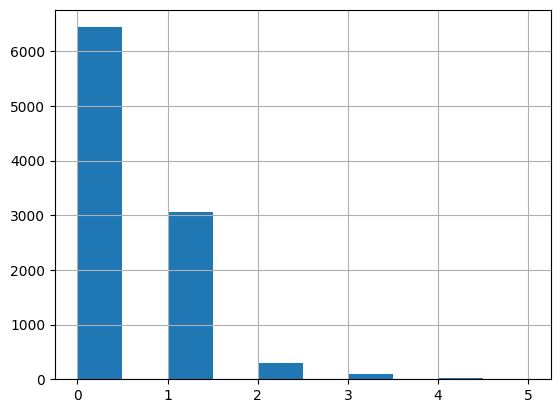

In [10]:
df_issues["labels"].apply(
    lambda x: len(x)
).hist()

More than 60% data has no labels.

In [11]:
df_issues["labels"].apply(
    lambda x: len(x)
).value_counts().to_frame().T

,0,1,2,3,4,5
labels,6440,3057,305,100,25,3


In [12]:
df_counts = df_issues["labels"].explode().value_counts()
print(f"Number of labels: {len(df_counts)}")
df_counts.to_frame().head(8).T

Number of labels: 65


,wontfix,model card,Core: Tokenization,New model,Core: Modeling,Help wanted,Good First Issue,Usage
labels,2284,649,106,98,64,52,50,46


In [13]:
df_issues["labels"].explode()

0             NaN
1             NaN
2       DeepSpeed
3             NaN
4             NaN
          ...    
9925          NaN
9926          NaN
9927          NaN
9928          NaN
9929      wontfix
Name: labels, Length: 10522, dtype: object

We can see that there are 65 unique labels in the dataset and the classes are very imbalanced with `wontfix` and `modelcard` being the most common labels. To make the classification problem more traceable, we'll build a tagger on subset of labels that are potentially difficult fo find like `First Issue` and `Help Wanted`, for `model card` a simple rule that detects whena a model card is added on the Hugging Face Hub.

The following code filters the dataset for the subset of labels and simplifies the labels for ease of use.

In [14]:
label_map = {
    "Core: Tokenization": "tokenization",
    "New model": "new model",
    "Core: Modeling": "model training",
    "Usage": "usage",
    "Core: Pipeline": "pipeline",
    "TensorFlow": "tensorflow or tf",
    "PyTorch": "pytorch",
    "Examples": "examples",
    "Documentation": "documentation"
}

def filter_labels(x):
    return [label_map[label] for label in x if label in label_map]

df_issues["labels"] = df_issues["labels"].apply(filter_labels)
all_labels = list(label_map.values())

In [15]:
df_counts = df_issues["labels"].explode().value_counts()
print(f"Number of labels after label map: {len(df_counts)}")
df_counts.to_frame().T

Number of labels after label map: 9


,tokenization,new model,model training,usage,pipeline,tensorflow or tf,pytorch,documentation,examples
labels,106,98,64,46,42,41,37,28,24


Let's create a new column to identify whether the issue is labelled or not, which'll be useful later.

In [16]:
df_issues["split"] = "unlabeled"
df_issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app,pull_request,split
0,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849568459,MDU6SXNzdWU4NDk1Njg0NTk=,11046,Potential incorrect application of layer norm ...,...,0,2021-04-03 03:37:32,2021-04-03 03:37:32,NaT,NONE,None,"In BlenderbotSmallDecoder, layer norm is appl...",NaN,None,unlabeled
1,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849544374,MDU6SXNzdWU4NDk1NDQzNzQ=,11045,Multi-GPU seq2seq example evaluation significa...,...,0,2021-04-03 00:52:24,2021-04-03 00:52:24,NaT,NONE,None,\r\n### Who can help\r\n@patil-suraj @sgugger ...,NaN,None,unlabeled
2,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849529761,MDU6SXNzdWU4NDk1Mjk3NjE=,11044,[DeepSpeed] ZeRO stage 3 integration: getting ...,...,0,2021-04-02 23:40:42,2021-04-03 00:00:18,NaT,COLLABORATOR,None,"**[This is not yet alive, preparing for the re...",NaN,None,unlabeled
3,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849499734,MDU6SXNzdWU4NDk0OTk3MzQ=,11043,Can't load model to estimater,...,0,2021-04-02 21:51:44,2021-04-02 21:51:44,NaT,NONE,None,I was trying to follow the Sagemaker instructi...,NaN,None,unlabeled
4,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849274362,MDU6SXNzdWU4NDkyNzQzNjI=,11042,[LXMERT] Unclear what img_tensorize does with ...,...,0,2021-04-02 15:12:57,2021-04-02 15:15:07,NaT,NONE,None,## Environment info\r\n\r\n- `transformers` ve...,NaN,None,unlabeled


In [17]:
df_issues["labels"].apply(lambda x: len(x)) > 0

0       False
1       False
2       False
3       False
4       False
        ...  
9925    False
9926    False
9927    False
9928    False
9929    False
Name: labels, Length: 9930, dtype: bool

In [18]:
mask = df_issues["labels"].apply(lambda x: len(x)) > 0
df_issues.loc[mask, "split"] = "labeled"
df_issues["split"].value_counts().to_frame()

,split
unlabeled,9489
labeled,441


In [19]:
# Let's check a single sample
for column in ["title", "body", "labels"]:
    print(f"{column}: {df_issues[column].iloc[26][:500]}\n")

title: Add new CANINE model

body: # 🌟 New model addition

## Model description

Google recently proposed a new **C**haracter **A**rchitecture with **N**o tokenization **I**n **N**eural **E**ncoders architecture (CANINE). Not only the title is exciting:

> Pipelined NLP systems have largely been superseded by end-to-end neural modeling, yet nearly all commonly-used models still require an explicit tokenization step. While recent tokenization approaches based on data-derived subword lexicons are less brittle than manually en

labels: ['new model']



In this example, a new model architecture is proposed, so the label `new model` makes sense. title also has some useful information, let's concatenate title with body field:

In [20]:
df_issues["text"] = df_issues.apply(
    lambda x: x["title"] + "\n\n" + x["body"], axis=1
)

In [21]:
df_issues[["text", "title", "body"]].head()

,text,title,body
0,Potential incorrect application of layer norm ...,Potential incorrect application of layer norm ...,"In BlenderbotSmallDecoder, layer norm is appl..."
1,Multi-GPU seq2seq example evaluation significa...,Multi-GPU seq2seq example evaluation significa...,\r\n### Who can help\r\n@patil-suraj @sgugger ...
2,[DeepSpeed] ZeRO stage 3 integration: getting ...,[DeepSpeed] ZeRO stage 3 integration: getting ...,"**[This is not yet alive, preparing for the re..."
3,Can't load model to estimater\n\nI was trying ...,Can't load model to estimater,I was trying to follow the Sagemaker instructi...
4,[LXMERT] Unclear what img_tensorize does with ...,[LXMERT] Unclear what img_tensorize does with ...,## Environment info\r\n\r\n- `transformers` ve...


Before looking at rest of the data, let's remove the duplicates.

In [22]:
len_before = len(df_issues)
df_issues = df_issues.drop_duplicates(subset="text")
print(f"Removed {(len_before - len(df_issues))/len_before:.2%} duplicates.")

Removed 1.88% duplicates.


We've removed few duplicate issues in our dataset, but that's only a small percentage. Next let's take a look at the distribution of words to see if we'll loose much information when we truncate to each model's context size:

Text(0, 0.5, 'Number of issues')

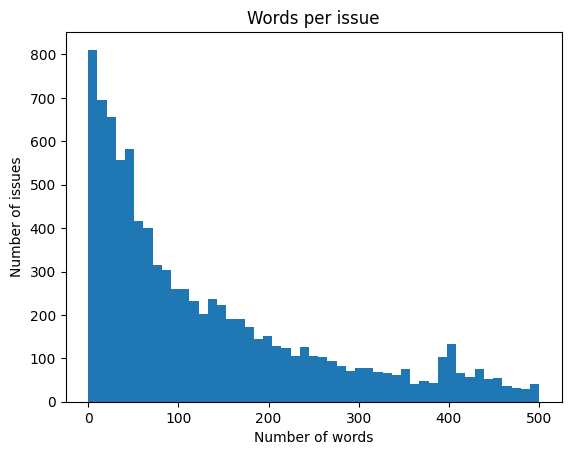

In [23]:
import numpy as np
import matplotlib.pyplot as plt

df_issues["text"].str.split().apply(len).hist(
    bins=np.linspace(0, 500, 50), grid=False
)
plt.title("Words per issue")
plt.xlabel("Number of words")
plt.ylabel("Number of issues")

The distribution has the long tail characterstic of most text datasets. Most of the texts are fairly short, few texts are over 500 words these might include code, logs, errors etc. Transformer models have a context sixe of 512 tokens or larger, truncating a handful of long issues is not likely to affect the overall performance. Next let's define our training and validation set.

### Creating Training Sets

Creating training and validation sets for multilabel problems is trickier because there is no guranteed balance for all labels. For this we can use [SciKit-multilearn libaray](http://scikit.ml/), which is specifically setup for this purpose. First we've to transform the labels into a format model can process. We can use `MultiLabelBinarizer` class from SciKit-learn. which accepts a list of labels and creates a vector with zeros for absent labels and ones for present labels. Let's test this by fit and tranform on `all_labels` to learn the mapping from label name to ID as follows:

In [24]:
all_labels

['tokenization',
 'new model',
 'model training',
 'usage',
 'pipeline',
 'tensorflow or tf',
 'pytorch',
 'examples',
 'documentation']

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit([all_labels])
mlb.transform([["tokenization", "new model"], ["pytorch"]])

array([[0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]])

To create the splits we can use the `iterative_train_test_split()` function from Scikit-multilearn, which creates train/test splits iteratively to achieve balanced labels. We can wrap it in a function that we can apply to `DataFrame`s. Since this function expects a two-dimenstional feature matrix, we need to add a dimension to the possible indices before making the split:

In [26]:
from skmultilearn.model_selection import iterative_train_test_split

def balanced_split(df, test_size=0.5):
    ind = np.expand_dims(np.arange(len(df)), axis=1)
    labels = mlb.transform(df["labels"])
    ind_train, _, ind_test, _ = iterative_train_test_split(
        ind,
        labels,
        test_size,
    )
    return df.iloc[ind_train[:, 0]], df.iloc[ind_test[:,0]]

With this `balanced_split()` function, we can split the data into supervised and unsupervised datasets, and then create balanced training, validation and test sets for supervised part:

In [27]:
from sklearn.model_selection import train_test_split

df_clean = df_issues[["text", "labels", "split"]].reset_index(drop=True).copy()
df_unsup = df_clean.loc[df_clean["split"] == "unlabeled", ["text", "labels"]]
df_sup = df_clean.loc[df_clean["split"] == "labeled", ["text", "labels"]]

df_clean.head()

,text,labels,split
0,Potential incorrect application of layer norm ...,[],unlabeled
1,Multi-GPU seq2seq example evaluation significa...,[],unlabeled
2,[DeepSpeed] ZeRO stage 3 integration: getting ...,[],unlabeled
3,Can't load model to estimater\n\nI was trying ...,[],unlabeled
4,[LXMERT] Unclear what img_tensorize does with ...,[],unlabeled


In [28]:
np.random.seed(0)
df_train, df_tmp = balanced_split(
    df_sup, test_size=0.5
)
df_valid, df_test = balanced_split(
    df_tmp, test_size=0.5
)

Finally, let's create a `DatasetDict` with all the splits so that we can easily tokenize the dataset and integrate with the `Trainer`.

In [29]:
df_train.head()

,text,labels
26,Add new CANINE model\n\n# 🌟 New model addition...,[new model]
107,Please implement DUMA: Reading Comprehension w...,[new model]
264,Can DeepSpeed ZeRO-3 be applied for training? ...,[new model]
484,XLSR-53\n\n# 🚀 Feature request\r\n\r\nIs it po...,[new model]
566,[examples] should all examples support the pre...,[examples]


All our splits have an index, so we'll reset the index before adding it to DatasetDict.

In [30]:
from datasets import DatasetDict, Dataset

ds = DatasetDict(
{
    "train": Dataset.from_pandas(df=df_train.reset_index(drop=True)),
    "valid": Dataset.from_pandas(df_valid.reset_index(drop=True)),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True)),
    "unsup": Dataset.from_pandas(df_unsup.reset_index(drop=True)),
}
)
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 223
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 106
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 111
    })
    unsup: Dataset({
        features: ['text', 'labels'],
        num_rows: 9303
    })
})

This looks good, so the last thing to do is to create some training slices so that we can evaluate the performance of each classifier as a function of the training set size.

### Create Traininig Slices

This dataset has two characterstics that we want to investigate in this notebook: sparse labelled data and multilabel classification. The training sample consists ofonly 223 samples which is really small even for transfer learning. In this notebook we'll slice the training data further to investigate various regime or functions to deal with such situations and compare the performance against the number of training datapoints uses. We'll start with only eight samples per label and build up until the slice covers the full training set using `iterative_train_test_split()` function:

In [31]:
np.random.seed(0)
all_indices = np.expand_dims(list(range(len(ds["train"]))), axis=1)
indices_pool = all_indices
labels = mlb.transform(ds["train"]['labels'])
train_samples = [8, 16, 32, 64, 128]
train_slices, last_k = [], 0


for i, k in enumerate(train_samples):
    print(k)
    print(f"Number of training slices: {k}")
    print(f"Previous number of training slices: {last_k}")
    print(f"Length of indices: {len(indices_pool)}")
    print(f"Length of labels: {len(labels)}")
    # indices_pool, labels, new_slice, _ = iterative_train_test_split(
    #     X=indices_pool, # Initially this will be all_indices, then for each iteration a slice(8, 16, etc) will be reduced and go into new_slice
    #     y=labels,
    #     test_size=(k-last_k)/len(labels)
    # )
    indices_pool, labels, new_slice, _ = iterative_train_test_split(
        indices_pool, labels, (k-last_k)/len(labels))
    print(f"Number of indices pool after iterative split: {len(indices_pool)}")
    print(f"Number of labels after iterative split: {len(labels)}")
    print(f"Number of samples in new slice after iterative split: {len(new_slice)}")
    last_k = k

    if i == 0:
        train_slices.append(new_slice)
    else:
        train_slices.append(np.concatenate((
            train_slices[-1], # Previous slice
            new_slice, # current slice
        )))

# Add full dataset
train_slices.append(all_indices), train_samples.append(len(ds['train']))

8
Number of training slices: 8
Previous number of training slices: 0
Length of indices: 223
Length of labels: 223
Number of indices pool after iterative split: 213
Number of labels after iterative split: 213
Number of samples in new slice after iterative split: 10
16
Number of training slices: 16
Previous number of training slices: 8
Length of indices: 213
Length of labels: 213
Number of indices pool after iterative split: 204
Number of labels after iterative split: 204
Number of samples in new slice after iterative split: 9
32
Number of training slices: 32
Previous number of training slices: 16
Length of indices: 204
Length of labels: 204
Number of indices pool after iterative split: 187
Number of labels after iterative split: 187
Number of samples in new slice after iterative split: 17
64
Number of training slices: 64
Previous number of training slices: 32
Length of indices: 187
Length of labels: 187
Number of indices pool after iterative split: 155
Number of labels after iterative s

(None, None)

In [32]:
len(train_slices), train_slices[0][:5], train_slices[1][:5]

(6,
 array([[ 0],
        [ 2],
        [ 9],
        [11],
        [18]]),
 array([[ 0],
        [ 2],
        [ 9],
        [11],
        [18]]))

In [33]:
# Let's squeeze the train slices to remove the additional dimenstion added to work with iterative_train_test_split
train_slices = [np.squeeze(train_slice) for train_slice in train_slices]

In [34]:
len(train_slices), train_slices[0][:5], train_slices[1][:5]

(6, array([ 0,  2,  9, 11, 18]), array([ 0,  2,  9, 11, 18]))

In [35]:
print(f"Target split size:\n{train_samples}")
print(f"Actual split sizes:\n{[len(x) for x in train_slices]}")

Target split size:
[8, 16, 32, 64, 128, 223]
Actual split sizes:
[10, 19, 36, 68, 134, 223]


## Implementing a Naive Bayseline

Whenever we start a new NLP project, it's always a good idea to establish a strong baseline there are two reasons for this:

1. A baseline based on regular expressions or handcrafted rules might already work well, In this case no need to bring out transformers which is hard to maintain, deploy in production.
2. The baselines provide quick checks and comparison as we explore more complex models. For example, if we achieve 80% accuracy on validation set with BERT we might write it off as a hard dataset. But what if we've a logistic regression baseline with 95% accuracy, we'll then investigate or debug what's wrong with the model.

So let's start out analysis by training a baseline model. For text classification  great baseline is *Naive Bayes classifier* whicc is very simple and quick to train. sci-Kit Learn's Naive Bayes doesn't support multi label classification out of the box. But we can use Scikit-multilearn to cast the problem as one-vs-rest classification task where we train *L* binary classifiers for *L* labels.

First let's use a multilabel binarizer to create a new `label_ids` column in our training sets. We can use `map()` to take of all processing in one go.

In [36]:
ds["train"]["labels"][:10]

[['new model'],
 ['new model'],
 ['new model'],
 ['new model'],
 ['examples'],
 ['examples'],
 ['new model'],
 ['new model'],
 ['examples'],
 ['tensorflow or tf']]

In [37]:
def prepare_labels(batch):
    batch["label_ids"] = mlb.transform(batch["labels"])
    return batch

ds = ds.map(prepare_labels, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

In [38]:
print(f"Raw labels:\n{ds['train']['labels'][:10]}")
print(f"Labels after transform:\n{ds['train']['label_ids'][:10]}")

Raw labels:
[['new model'], ['new model'], ['new model'], ['new model'], ['examples'], ['examples'], ['new model'], ['new model'], ['examples'], ['tensorflow or tf']]
Labels after transform:
[[0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0]]


To measure the performance of our classifiers, we'll use the micro and macro F1-scores, where the former tracks performance on the frequent labels and the later on all the labels disregarding the frequency. Since we'll be evaluation each model across different-sized training splits, let's create a `defaultdict` witha list to store the scores per split:

In [ ]:
from collections import defaultdict

macro_scores, micro_scores = defaultdict(list), defaultdict(list)

Next let's write some code to train and evaluate our baseline across increasing training set sizes:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.feature_extraction.text import CountVectorizer

for train_slice in train_slices:

    # Get traning slice and test data
    ds_train_sample = ds["train"].select(train_slice)
    y_train = np.array(ds_train_sample["label_ids"])
    y_test = np.array(ds["test"]["label_ids"])

    # Use a count vectorizer to encode our texts as token counts
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(ds_train_sample["text"])
    X_test_counts = count_vect.transform(ds["test"]["text"])

    # Create and train out model
    classifier = BinaryRelevance(
        classifier=MultinomialNB(),
    )
    classifier.fit(X_train_counts, y_train)

    # Generate predictions and evaluate
    y_pred_test = classifier.predict(X_test_counts)
    clf_report = classification_report(
        y_test, y_pred_test, target_names=mlb.classes_, zero_division=0, output_dict=True,
    )
    print(clf_report)
    macro_scores["Naive Bayes"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Naive Bayes"].append(clf_report["micro avg"]["f1-score"])

{'documentation': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7}, 'examples': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6}, 'model training': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16}, 'new model': {'precision': 1.0, 'recall': 0.7083333333333334, 'f1-score': 0.8292682926829268, 'support': 24}, 'pipeline': {'precision': 0.5, 'recall': 0.18181818181818182, 'f1-score': 0.26666666666666666, 'support': 11}, 'pytorch': {'precision': 0.6, 'recall': 0.3, 'f1-score': 0.4, 'support': 10}, 'tensorflow or tf': {'precision': 0.4, 'recall': 0.18181818181818182, 'f1-score': 0.25000000000000006, 'support': 11}, 'tokenization': {'precision': 0.5, 'recall': 0.2692307692307692, 'f1-score': 0.35000000000000003, 'support': 26}, 'usage': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 12}, 'micro avg': {'precision': 0.6326530612244898, 'recall': 0.25203252032520324, 'f1-score': 0.3604651162790698, 'support': 123}, 'macro avg': {'pre

In [ ]:
macro_scores, micro_scores

(defaultdict(list,
             {'Naive Bayes': [0.23288166214995487,
               0.21006897585844955,
               0.24086240556828795,
               0.25730500818220114,
               0.28271105113210376,
               0.27403710305671086]}),
 defaultdict(list,
             {'Naive Bayes': [0.3604651162790698,
               0.30208333333333337,
               0.41081081081081083,
               0.4435483870967742,
               0.5046728971962616,
               0.5346534653465347]}))

In [95]:
import matplotlib.pyplot as plt
def plot_metrics(micro_scores, macro_scores, sample_sizes, current_model):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    for run in micro_scores.keys():
        if run == current_model:
            ax0.plot(sample_sizes, micro_scores[run], label=run, linewidth=2)
            ax1.plot(sample_sizes, macro_scores[run], label=run, linewidth=2)
        else:
            ax0.plot(sample_sizes, micro_scores[run], label=run, linestyle="dashed")
            ax1.plot(sample_sizes, macro_scores[run], label=run, linestyle="dashed")

    ax0.set_title("Micro F1 scores")
    ax1.set_title("Macro F1 scores")
    ax0.set_ylabel("Test set F1 score")
    ax0.legend(loc="lower right")
    for ax in [ax0, ax1]:
        ax.set_xlabel("Number of training samples")
        ax.set_xscale("log")
        ax.set_xticks(sample_sizes)
        ax.set_xticklabels(sample_sizes)
        ax.minorticks_off()

    plt.tight_layout()
    plt.show()

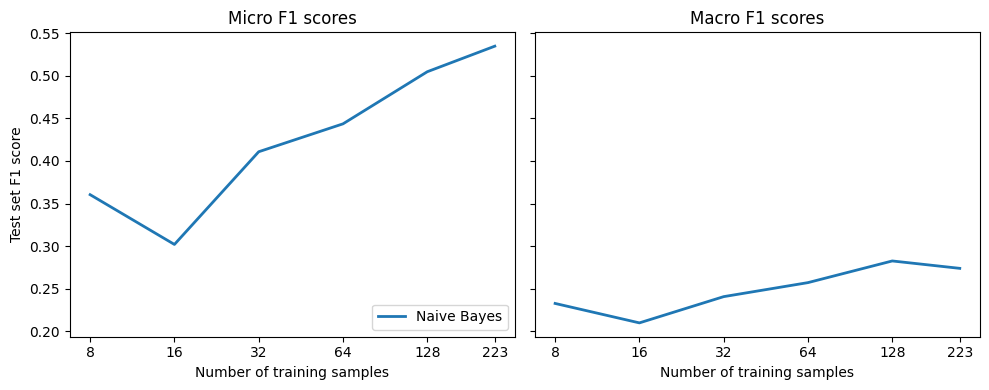

In [ ]:
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes")

Note that we plot the number of samples on a logarithmic scale. From the figure we can see that the micro and macro F1-scores both improve as we increase the number of training samples. Let's now see how the results fare against transformer-based approaches.

## Working with No Labeled Data

The first technique that we'll consider is the *zero-shot classification*, which is suitable in settings where we've no labelled data or labelling samples is expensive. We'll cheat a bit in this section since we will still use the test data to measure the performance, but we will not use any data to train the model(otherwise the comparison to the following approaches would be difficult).

The goal of zero-shot classification is to make use of a pretrained model without any additional fine-tuning on task specific corpus. How could this work? Let's take BERT, BERT pretrained models are trained on wikipedia dumps to predict a masked token. To predict a masked token, BERT needs to be aware of the topic in the context. We can try to tick the model into classifying a document for us by prodviding a sentence like:

*This section was about the topic [MASK].*

The model should then give a reasonable suggestion for the document's topic, since this is a natural text to occur in the dataset.

Let's illustrate this further with the following toy problem:
Suppose we've a watch party, one group likes romcom and another group likes action. But we've exhausted all the movies the group knows. We wan't to know what type of movie is based on a little movie description. The first thing to try is to load BERT-base in the `fill-mask` pipeline, which uses the masked language to predict the content of masked tokens:

In [ ]:
# Load the model
from transformers import pipeline
pipe = pipeline("fill-mask", model="bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
movie_desc = "The main characters of the movie is a retired gangster coming back to save his family."
prompt = "The movie belongs to [MASK] genre."

output = pipe(movie_desc + prompt)
output

[{'score': 0.12692779302597046,
  'token': 2530,
  'token_str': 'western',
  'sequence': 'the main characters of the movie is a retired gangster coming back to save his family. the movie belongs to western genre.'},
 {'score': 0.10347744822502136,
  'token': 20067,
  'token_str': 'gangster',
  'sequence': 'the main characters of the movie is a retired gangster coming back to save his family. the movie belongs to gangster genre.'},
 {'score': 0.09434739500284195,
  'token': 2023,
  'token_str': 'this',
  'sequence': 'the main characters of the movie is a retired gangster coming back to save his family. the movie belongs to this genre.'},
 {'score': 0.0414746068418026,
  'token': 16046,
  'token_str': 'bollywood',
  'sequence': 'the main characters of the movie is a retired gangster coming back to save his family. the movie belongs to bollywood genre.'},
 {'score': 0.036460988223552704,
  'token': 10874,
  'token_str': 'thriller',
  'sequence': 'the main characters of the movie is a reti

In [ ]:
for element in output:
    print(f"Token {element['token_str']}:\t{element['score']:.3f}")

Token western:	0.127
Token gangster:	0.103
Token this:	0.094
Token bollywood:	0.041
Token thriller:	0.036


Cleary the model predicts what genre it belongs. We can also turn this around, and instead of getting the most likely tokens we can query the pipeline for the probabality of a few given tokens. For this task we might choose `action`, and `romcom`, so we can pass them to pipeline as targets:

In [ ]:
movie_desc = "In this movie is about how two opposite personalities fall in love with each other."
output = pipe(movie_desc + prompt, targets=["romance", "action"])
for element in output:
    print(f"Token {element['token_str']}:\t{element['score']:.3f}")

Token romance:	0.044
Token action:	0.003


As expected, the predicted probabality for `action` is much smaller than `romance`. Let's try this for action as well.

In [ ]:
movie_desc = "A non-violent tribe is attacked by warriors looking for slaves and humans to be sacrificed. One of the tribesmen is captured, but he manages to escape in a bid to save his family."
output = pipe(movie_desc + prompt, targets=["romance", "action"])
for element in output:
    print(f"Token {element['token_str']}:\t{element['score']:.3f}")

Token romance:	0.022
Token action:	0.005


In [ ]:
movie_desc = "A non-violent tribe is attacked by warriors looking for slaves and humans to be sacrificed. One of the tribesmen is captured, but he manages to escape in a bid to save his family."
output = pipe(movie_desc + prompt, targets=["romance", "action"])
for element in output:
    print(f"Token {element['token_str']}:\t{element['score']:.3f}")

Token romance:	0.022
Token action:	0.005


The predicted token probabality is bad. But this the key idea of many approaches to be discussed in this notebook: find a way to adapt a pretraine model for another task without training. In this case we set up a prompt with a ask in such a way that we use a masked language model directly for classiication. Let's see if we can do better by adapting a model that has been fine-tuned on a task that's closer to text classification: *natural language inference* (NLI).

Using the masked language model for classification is a nice trick, but we can do better still by using a model that has been trained ona task that is closer to classification. There is a neat proxy task called *text entailment* that fits the bill. In text entailment, the model needs to determine whether two text passages are likely to follow or contradict each other. Models are typically trained tod etect entailments and contradictions with datasets such as Multi-Genre NLI Corpus(MNLI) or Cross-Lingual NLI Corpus (XNLI).

Each sample in these datasets is composed of three parts:

1. Premise
2. Hypothesis
3. Label

Which can be one of:

1. entailment
2. neutral
3. contradiction

The entailment label is assigned when the hypothesis text is necessarily true under the premise. The contradiction label is used when the hypothesis is necessarily false or inappropriate under the premise. If neither of the cases applies neutral label.

*Examples for these three*

![alt](https://github.com/JpChii/nlp-with-hugging-face/blob/main/notes/images/9-dealing-with-few-to-no-labels/mnli-three-classes.png?raw=1)

Now we can hijack this model trained on mnli dataset to build a classifier without needing any labels at all! The key idea is to treat the text we wish to classify as the premise, and then formulate the hypothesis as:

"The example is about {label}."

When we insert the class name for the label. The entailment score tells us how likely the premise is aboyt the topic, and we can run this for any number of classes sequenially. Few drawbacks:

1. We've to run a forward pass for all the available classes, which is less efficient than a standard classifier
2. The label names have a great impact on accuracy, as `class 1` label name has no hint to determine whether it's entailment, . The best approach is to use a label with semantic meaning.

Transformers has an MNLI model for zero-shot classification built in. We can intialize the pipeline as follows:

In [ ]:
from transformers import pipeline

pipe = pipeline("zero-shot-classification")
pipe

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
sample = ds["train"][0]
print(f"Labels: {sample['labels']}")
output = pipe(sample["text"], all_labels, multi_label=True)
print(output["sequence"][:400])
print("\nPredictions:")

for label, score in zip(output["labels"], output["scores"]):
    print(f"{label}, {score:.2f}")

Labels: ['new model']
Add new CANINE model

# 🌟 New model addition

## Model description

Google recently proposed a new **C**haracter **A**rchitecture with **N**o tokenization **I**n **N**eural **E**ncoders architecture (CANINE). Not only the title is exciting:

> Pipelined NLP systems have largely been superseded by end-to-end neural modeling, yet nearly all commonly-used models still require an explicit tokeni

Predictions:
new model, 0.98
tensorflow or tf, 0.37
examples, 0.34
usage, 0.30
pytorch, 0.25
documentation, 0.25
model training, 0.24
tokenization, 0.17
pipeline, 0.16


In [ ]:
output["labels"], output["scores"]

(['new model',
  'tensorflow or tf',
  'examples',
  'usage',
  'pytorch',
  'documentation',
  'model training',
  'tokenization',
  'pipeline'],
 [0.983889102935791,
  0.3655166029930115,
  0.3364446461200714,
  0.29671603441238403,
  0.24781309068202972,
  0.24500343203544617,
  0.2352941781282425,
  0.17372360825538635,
  0.16041657328605652])

> **Note:** Since we are usign subword tokenizer we can pass code to the pipeline. Even though the dataset doesn't have lots of code, code itself is natural langauge so this shouldn't be a problem. We can also get information like framework in use etc.

We can see the model is confident about new model but it also gives high scores for other labels as well. This is because the data passed is not similar to the dataset domain, thut it's a challenging task for the model.

Let's write a function to evaluate a single sequence and use `map()` to apply it to all sequences.

In [ ]:
def zero_shot_pipeline(example):
  output = pipe(example["text"], all_labels, multi_label=True)
  # Output has predicted_labels and scores, let's add them
  example["predicted_labels"] = output["labels"]
  example["scores"] = output["scores"]
  return example

In [ ]:
import os
zero_shot_output_dir = "ds_zero_shot/"
is_data_present = len(os.listdir(zero_shot_output_dir))> 1
if not is_data_present:
  ds_zero_shot = ds["valid"].map(zero_shot_pipeline)
else:
  ds_zero_shot_loaded = Dataset.load_from_disk("ds_zero_shot/")

In [ ]:
ds_zero_shot.save_to_disk(zero_shot_output_dir)

In [ ]:
ds_zero_shot_loaded = Dataset.load_from_disk("ds_zero_shot/")

In [ ]:
!tar -zxf ds_zero_shot.tar.gz ds_zero_shot/

Now that we've scores, the next step is to determine which set of labels should be assigned to each example. We'll use the below options:
1. Define a threshold score and select all labels above threshold
2. Pick the top k labels with the k highest scores

Let's write a funtion to this for us:

In [ ]:
def get_preds(example, threshold=None, topk=None):
  preds = []
  if threshold:
    for label, score in zip(example["predicted_labels"], example["scores"]):
      if score >= threshold:
        preds.append(label)
  elif topk:
    for i in range(topk):
      preds.append(example["predicted_labels"][i])
  else:
    raise ValueError("Set either `threshold` or `topk`")
  return {"pred_label_ids": list(np.squeeze(mlb.transform([preds])))}

Next let's write a second function, that returns the Scikit-learn classification report from a dataset with predicted labels:

In [ ]:
def get_clf_report(ds):
  y_true = np.array(ds["label_ids"])
  y_pred = np.array(ds["pred_label_ids"])
  return classification_report(
      y_true,
      y_pred,
      zero_division=0,
      target_names=mlb.classes_,
      output_dict=True
  )

Let's combine these two functions, let's start with the top-k method by increasing k for several values and then plotting the micro and macro f1-scores across the validation set:

In [ ]:
macros, micros = [], []
topks = [1, 2, 3, 4]
for topk in topks:
  ds_zero_shot_k = ds_zero_shot_loaded.map(get_preds, batched=False,
                                    fn_kwargs={'topk': topk})
  clf_report = get_clf_report(ds_zero_shot_k)
  micros.append(clf_report["micro avg"]["f1-score"])
  macros.append(clf_report["macro avg"]["f1-score"])

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

In [ ]:
macros, micros

([0.4328047974551859,
  0.41191702300926974,
  0.3736855006983264,
  0.36106103221911373],
 [0.4867256637168142,
  0.4518072289156626,
  0.3972602739726028,
  0.36764705882352944])

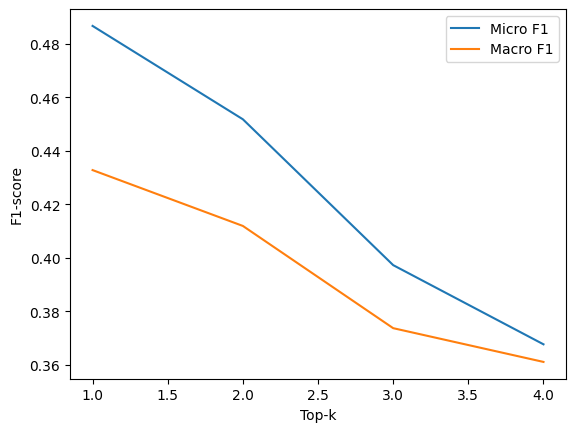

In [ ]:
plt.plot(topks, micros, label='Micro F1')
plt.plot(topks, macros, label='Macro F1')
plt.xlabel("Top-k")
plt.ylabel("F1-score")
plt.legend(loc='best')
plt.show()

From the plot we can see that the best results are obtained by selecting the label with the highest score per example(top 1). As most of our samples have a single label.

Next let's try out the threshold method.

In [ ]:
macros, micros = [], []
thresholds = np.linspace(0.01, 1, 100)
for threshold in thresholds:
    ds_zero_shot_k = ds_zero_shot.map(
        get_preds,
        fn_kwargs={"threshold": threshold}
      )
    clf_report = get_clf_report(ds_zero_shot_k)
    micros.append(clf_report["micro avg"]["f1-score"])
    macros.append(clf_report["macro avg"]["f1-score"])

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

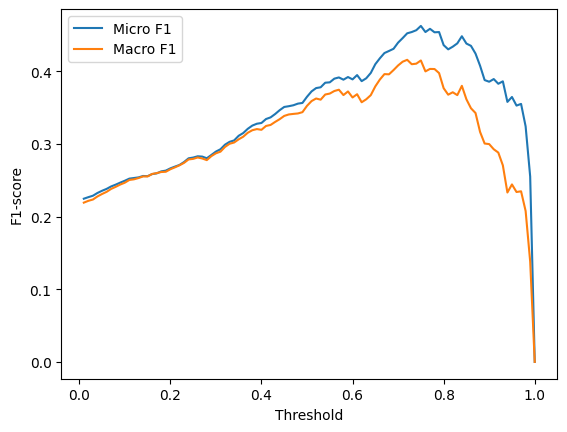

In [ ]:
plt.plot(thresholds, micros, label="Micro F1")
plt.plot(thresholds, macros, label="Macro F1")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.legend(loc="best")
plt.show()

In [ ]:
best_t, best_micro = thresholds[np.argmax(micros)], np.max(micros)
print(f'Best threshold (micro): {best_t} with F1-score {best_micro:.2f}.')
best_t, best_macro = thresholds[np.argmax(macros)], np.max(macros)
print(f'Best threshold (micro): {best_t} with F1-score {best_macro:.2f}.')

Best threshold (micro): 0.75 with F1-score 0.46.
Best threshold (micro): 0.72 with F1-score 0.42.


This approach fares somewhat worse than the top-1 results, but we can see the precision/recall trade-off clearly in this graph. When threshold is too low, there are too many predictions leading to low precision. If we set the threshold too high, then we will make hardly any predictions, which produces a low recall. A threshold value of around 0.8 is the sweet spot between two.

Since the top-1 method preforms best, let's use this to compare zero-shot classification against Naive Bayes on the test set.

In [ ]:
# Current scores
macro_scores, micro_scores

(defaultdict(list,
             {'Naive Bayes': [0.23288166214995487,
               0.21006897585844955,
               0.24086240556828795,
               0.25730500818220114,
               0.28271105113210376,
               0.27403710305671086]}),
 defaultdict(list,
             {'Naive Bayes': [0.3604651162790698,
               0.30208333333333337,
               0.41081081081081083,
               0.4435483870967742,
               0.5046728971962616,
               0.5346534653465347]}))

In [ ]:
# Get predictions
ds_zero_shot_test = ds["test"].map(zero_shot_pipeline)
# Convert it to topk=1 predictions and transform it to label_ids format
ds_zero_shot_top_1 = ds_zero_shot_test.map(get_preds, fn_kwargs={'topk': 1})
# Get metrics
clf_report = get_clf_report(ds_zero_shot_top_1)
# Since we calculated metrics for entire batch, we'll use the same scores for differnt training slices
for train_slice in train_slices:
    macro_scores['Zero Shot'].append(clf_report['macro avg']['f1-score'])
    micro_scores['Zero Shot'].append(clf_report['micro avg']['f1-score'])

  0%|          | 0/111 [00:00<?, ?ex/s]

  0%|          | 0/111 [00:00<?, ?ex/s]

In [ ]:
!tar -zxf ds_zero_shot_test.tar.gz ds_zero_shot_test/

In [ ]:
ds_zero_shot_test = Dataset.load_from_disk("ds_zero_shot_test/")
# Convert it to topk=1 predictions and transform it to label_ids format
ds_zero_shot_top_1 = ds_zero_shot_test.map(get_preds, fn_kwargs={'topk': 1})
# Get metrics
clf_report = get_clf_report(ds_zero_shot_top_1)
# Since we calculated metrics for entire batch, we'll use the same scores for differnt training slices
for train_slice in train_slices:
    macro_scores['Zero Shot'].append(clf_report['macro avg']['f1-score'])
    micro_scores['Zero Shot'].append(clf_report['micro avg']['f1-score'])

  0%|          | 0/111 [00:00<?, ?ex/s]

In [ ]:
macro_scores, micro_scores

(defaultdict(list,
             {'Naive Bayes': [0.23288166214995487,
               0.21006897585844955,
               0.24086240556828795,
               0.25730500818220114,
               0.28271105113210376,
               0.27403710305671086],
              'Zero Shot': [0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704]}),
 defaultdict(list,
             {'Naive Bayes': [0.3604651162790698,
               0.30208333333333337,
               0.41081081081081083,
               0.4435483870967742,
               0.5046728971962616,
               0.5346534653465347],
              'Zero Shot': [0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615]}))

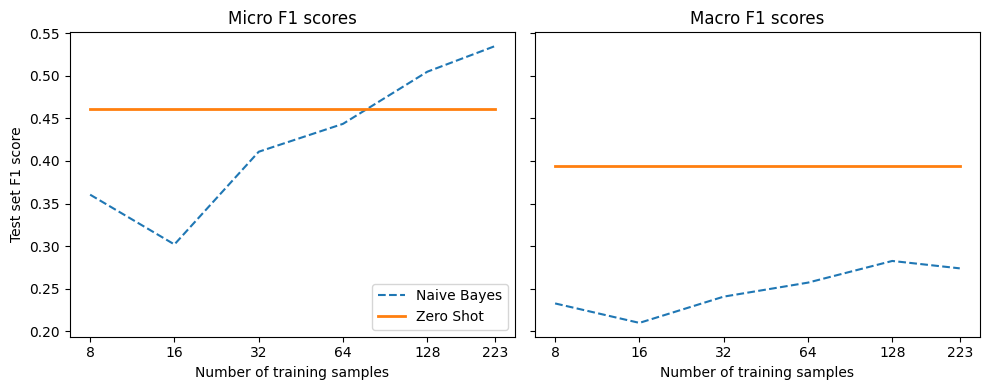

In [ ]:
plot_metrics(micro_scores, macro_scores, train_samples, "Zero Shot")

Comparing the zero-shot pipeline to the baseline, we observe two things:

1. If we've less than 50 labelled samples, zero-shot pipeline handily outperforms the baseline.
2. Even above the 50 samples, the performance of zero-shot is better in macro(performs well for non frequent classes) but in micro(performs well for frequent classes) baseline performs better.

> **Note:** There's a paradox here as we use labelled validation and test set to evaluate the pipeline. Even though we're working on data with no labels. It's better to get some labelled examples to perform quick evaluations. Here we did not adapt model parameters(no training) but adapted few hyperparameters(topk, threshold).

If it's difficult to get good results with zero-shot on own pipeline, we can try the below:

1. The pipeline works makes it sentsitive to label names. If the label names don't make sense the pipeline will perform poorly. we can modify the labels names, or in parallel.
2. We can pass and try different hypothesis than `hypothesis="This is example is about {}` depending on the usecase.

## Working with a Few Labels

In most NLP projects, we'll have a few labelled examples. We might get them from clients, experts or annotate by hand. We needed a few labeled examples to evaluate how well the zero-shot approach worked. Let's look at how we can best leverage the few precious labeled examples we have. We'll start with data augumentation that can help us multiply the litatle labeled data that we have.

### Data Augmentation

Data augmentation is a technique to generate new training samples from existig ones. This is common in computer vision, where we perform a random flip, zoom in, zoom out etc without changing the labels. In text this is little complex, why?

Original sentence - “Are elephants heavier than mice?” after swap “Are mice heavier than elephants?” the meaning's completley different. However, if the text contains more than a few sentence like our Github issues. Then the noise introduced by the transformations will generally not affect the label. In practice there are two types of augmentations:

1. *Back tranlation*
    Translate the text to one language and than backtranslate it to original language. If this text is different from original sequence then we'll use it.
2. *Token perturbations*
    Replacing token with randomn synonym, word insertion or deletion.

[There are lot's of data augmentation techniques covered in this article](https://amitness.com/2020/05/data-augmentation-for-nlp/)

We can use machine translation models like [M2M100](https://huggingface.co/facebook/m2m100_1.2B), while libraries like [Nplaug](https://github.com/makcedward/nlpaug) and [TextAttack](https://github.com/QData/TextAttack) provides various recipes for token perturbations.

We'll implement synonym replacement as it's simple to implement and understand data augmentation.
We'll use `ContextualWordEmbsAug` from NlpAug to leverage contextual word embedding of DistilBERT for our synonym replacements. Let's start with a simple example:

In [ ]:
from transformers import set_seed
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
import nltk
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
set_seed(3)
text = "Even if you defeat me Megatron, others will rise to defeat your tyranny"
augs = {}
augs["synonym_replace"] = naw.SynonymAug(aug_src="wordnet")
augs["random_insert"] = naw.ContextualWordEmbsAug(
    model_path="distilbert-base-uncased",
    device="cpu",
    action="insert",
    aug_max=1,
    )
augs["random_swap"] = naw.RandomWordAug(action="swap")
augs["random_delete"] = naw.RandomWordAug(action="delete")
augs["bt_en_de"] = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de',
    to_model_name='facebook/wmt19-de-en'
    )

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/825 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/825 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308k [00:00<?, ?B/s]

In [ ]:
augs

{'synonym_replace': <nlpaug.augmenter.word.synonym.SynonymAug at 0x78c9e6a477f0>,
 'random_insert': <nlpaug.augmenter.word.context_word_embs.ContextualWordEmbsAug at 0x78c9e6a440a0>,
 'random_swap': <nlpaug.augmenter.word.random.RandomWordAug at 0x78c8d171e650>,
 'random_delete': <nlpaug.augmenter.word.random.RandomWordAug at 0x78c8d1874190>,
 'bt_en_de': <nlpaug.augmenter.word.back_translation.BackTranslationAug at 0x78c8d171ec50>}

In [ ]:
for k,v in augs.items():
  print(f"Original text: {text}")
  print(f"{k}: {v.augment(text)}")
  print("")

Original text: Even if you defeat me Megatron, others will rise to defeat your tyranny
synonym_replace: Even if you kill me Megatron, others will prove to defeat your tyranny

Original text: Even if you defeat me Megatron, others will rise to defeat your tyranny
random_insert: even if you defeat me megatron, others humanity will rise to defeat your tyranny

Original text: Even if you defeat me Megatron, others will rise to defeat your tyranny
random_swap: You even if defeat me Megatron, others will rise defeat to tyranny your

Original text: Even if you defeat me Megatron, others will rise to defeat your tyranny
random_delete: Even if you me Megatron, others to defeat tyranny

Original text: Even if you defeat me Megatron, others will rise to defeat your tyranny
bt_en_de: Even if you defeat me, others will rise up to defeat your tyranny



In [ ]:
from transformers import set_seed
import nlpaug.augmenter.word as naw

set_seed(3)
aug = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased",
                                device="cpu", action="substitute")

text = "Transformers are the most popular toys"
print(f"Original text: {text}")
print(f"Augmented text: {aug.augment(text)}")

Original text: Transformers are the most popular toys
Augmented text: transformers'the most popular toys


Here we can see how the word are has been replaced with an apostrophe to generate a new synthetic training example.

Let's put this in a function to use with `map()`.

In [ ]:
def augment_text(batch, transformations_per_example=1):
    text_aug, label_ids = [], []
    for text, labels in zip(batch["text"], batch["label_ids"]):
        text_aug += [text]
        label_ids += [labels]
        for _ in range(transformations_per_example):
            text_aug += [aug.augment(text)]
            label_ids += [labels]
    return {"text": text_aug, "label_ids": label_ids}

Now when we pass this function to the `map()` method, we can generate any number of new examples witht the `transformations_per_example` argument. We can use this function in our code to train the Naive Bayes classifier by simply adding one line after we select the slice:

In [ ]:
for train_slice in train_slices:
  ds_train_sample = ds["train"].select(train_slice)
  # Flatten augumentation and align labels
  ds_train_aug = ds_train_sample.map(
      augment_text,
      batched=True,
      remove_columns=ds_train_sample.column_names,
  )
  y_train = np.array(ds_train_aug['label_ids'])
  y_test = np.array(ds["test"]["label_ids"])

  # Count vectorizer to encode our texts as token counts
  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform(ds_train_aug["text"])
  X_test_counts = count_vect.transform(ds["test"]["text"])

  # Create and train out model
  classifer = BinaryRelevance(classifier=MultinomialNB())
  classifier.fit(X_train_counts, y_train)

  # Generate predictions and evaluate
  y_pred_test = classifier.predict(X_test_counts)
  clf_report = classification_report(
      y_test, y_pred_test, target_names=mlb.classes_, zero_division=0, output_dict=True,
  )

  # Score metrics
  macro_scores['Naive Bayes + Aug'].append(clf_report["macro avg"]["f1-score"])
  micro_scores["Naive Bayes + Aug"].append(clf_report["micro avg"]["f1-score"])

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
macro_scores, micro_scores

(defaultdict(list,
             {'Naive Bayes': [0.23288166214995487,
               0.21006897585844955,
               0.24086240556828795,
               0.25730500818220114,
               0.28271105113210376,
               0.27403710305671086],
              'Zero Shot': [0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704],
              'Naive Bayes + Aug': [0.2737711831914731,
               0.25605893981645134,
               0.31979801437456845,
               0.3094434358950488,
               0.32029251106650486,
               0.3923299639243911]}),
 defaultdict(list,
             {'Naive Bayes': [0.3604651162790698,
               0.30208333333333337,
               0.41081081081081083,
               0.4435483870967742,
               0.5046728971962616,
               0.5346534653465347],
              'Zero Shot': [0.46153

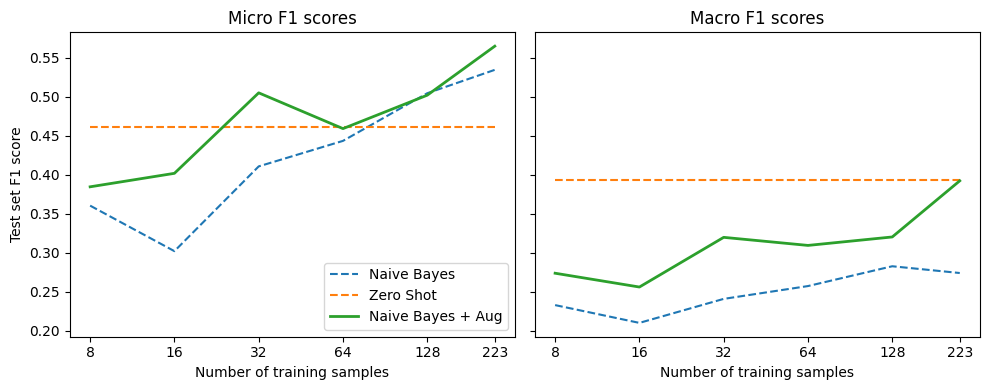

In [ ]:
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes + Aug")

There's a small improvment in macro f1 scores with augmentation it reaches the zero-shot score with 223 samples.

### Using Embeddings as a Lookup Table

Large Language Models like GPT-3 have been shown to be excellent at solving tasks with limited data. Because they've been trained on a huge corpus and learns useful representations across many dimensions such as sentiment, topic, text structure and more. Due to this reason we can use them to develop a semantic search engine to find similar documents, comments or classify text.

In this we'll create a text classifier that's modeled after the OpenAI API classification endpoint. The idea follows three steps:

1. Use language model to embed all labeled texts
2. Perform a nerest neighbor search for unlabeled text over embeddings
3. Aggregate the labels from nearest neighbors to get a prediction

The beauty of this approach is that no model fine-tuning is necessary to leverage the few availabldata points. Instead the decision lies on selecting on two things:
* Selecting an appropriate model that's trained on a similar datset
* Number of neighbors

Since GPT3 is available only via OpenAI API, we'll use GPT-2 to test this technique. We'll use a specific variant of GPT-2 that is trained on Python code. So it'll capture some of the contextual information contained in out GitHub issues.

We'll write a helper function that takes a list of texts and uses the GPT-2 model to return a single vector representation for a sequence. GPT-2 model returns an embedding for each token, to convert this to a single token(our requirement) we'll use *pooling* technique cald *mean pooling*. This is nothing but calculating an average of all token embeddings. We've to avoid the padding tokens, we can do this by leveraging attenion mask.

Let's implement this!

In [ ]:
# Load the models
import torch
from transformers import AutoTokenizer, AutoModel

model_ckpt = "miguelvictor/python-gpt2-large"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)
tokenizer.pad_token = tokenizer.eos_token

Downloading:   0%|          | 0.00/792 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Downloading:   0%|          | 0.00/2.92G [00:00<?, ?B/s]

Some weights of the model checkpoint at miguelvictor/python-gpt2-large were not used when initializing GPT2Model: ['lm_head.weight']
- This IS expected if you are initializing GPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       7.7Gi       134Mi       4.0Mi       4.8Gi       4.7Gi
Swap:             0B          0B          0B


In [ ]:
torch.cuda.empty_cache()

In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       7.2Gi       1.3Gi       5.0Mi       4.1Gi       5.2Gi
Swap:             0B          0B          0B


In [ ]:
sample = ds["train"][0]
sample_text = sample["text"]
sample_inputs = tokenizer(
    sample_text,
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="pt"
)
sample_inputs

{'input_ids': tensor([[ 4550,   649, 15628,  8881,  2746,   198,   198,     2, 12520,   234,
           253,   968,  2746,  3090,   201,   198,   201,   198,  2235,  9104,
          6764,   201,   198,   201,   198, 11708,  2904,  5150,   257,   649,
         12429,    34,  1174,  9869,  7321, 12429,    32,  1174,    81,   354,
          5712,   495,   351, 12429,    45,  1174,    78, 11241,  1634, 12429,
            40,  1174,    77, 12429,    45,  1174,    68,  1523, 12429,    36,
          1174, 10782,   375,   364, 10959,   357, 44565,  8881,   737,  1892,
           691,   262,  3670,   318,  7895,    25,   201,   198,   201,   198,
            29, 25149,   417,  1389,   399, 19930,  3341,   423,  5688,   587,
         22754, 15395,   416,   886,    12,  1462,    12,   437, 17019, 21128,
            11,  1865,  3016,   477,  8811,    12,  1484,  4981,   991,  2421,
           281,  7952, 11241,  1634,  2239,    13,  2893,  2274, 11241,  1634,
         10581,  1912,   319,  1366,  

In [ ]:
input_ids, attention_mask = sample_inputs["input_ids"], sample_inputs["attention_mask"]

In [ ]:
attention_mask.size(), attention_mask.shape

(torch.Size([1, 128]), torch.Size([1, 128]))

In [ ]:
model_output = model(**sample_inputs)

In [ ]:
model_output.keys(), model_output["last_hidden_state"].size()

(odict_keys(['last_hidden_state', 'past_key_values']),
 torch.Size([1, 128, 1280]))

In [ ]:
attention_mask.unsqueeze(-1).expand(model_output["last_hidden_state"].size()).size()

torch.Size([1, 128, 1280])

In [ ]:
model_output["last_hidden_state"] * attention_mask.unsqueeze(-1).expand(model_output["last_hidden_state"].size())

tensor([[[-0.2826,  0.5010,  0.2451,  ...,  0.1343,  0.5724, -0.7197],
         [ 0.1209,  0.7332, -0.4027,  ..., -0.5314, -0.0199,  0.6082],
         [ 1.2570,  0.6268,  0.7592,  ...,  0.5813,  0.4681, -0.8780],
         ...,
         [ 0.5383, -0.5888, -0.9948,  ..., -0.5265, -0.4582, -1.6510],
         [ 0.5697, -0.2688, -0.9420,  ..., -1.1645, -0.4490, -1.0202],
         [ 0.5146, -0.9987, -0.8530,  ...,  0.3458, -0.2782, -1.8619]]],
       grad_fn=<MulBackward0>)

In [ ]:
input_mask_expanded = torch.sum(model_output["last_hidden_state"] * attention_mask.unsqueeze(-1).expand(model_output["last_hidden_state"].size()), 1)

In [ ]:
input_mask_expanded.shape

torch.Size([1, 1280])

In [ ]:
input_mask_expanded

tensor([[ -2.6559,  -5.9979, -24.9606,  ...,  31.8617, -37.8896, -94.3213]],
       grad_fn=<SumBackward1>)

In [ ]:
sum_embeddings = torch.sum(model_output["last_hidden_state"] * input_mask_expanded, 1)
sum_embeddings.size()

torch.Size([1, 1280])

In [ ]:
sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
sum_mask.size()

torch.Size([1])

In [ ]:
(sum_embeddings / sum_mask).size()

torch.Size([1, 1280])

In [ ]:
def mean_pooling(model_output, attention_mask):
  """
  Function to pool indivual token embeddings to a single embedding

  model_output: GPT2 output
  attetnion_mask: attention_mask to combine all token embeddings to single embedding

  Return:
    sequence_embedding obtained with average
  """

  # last_hidden_state, token_embeddings from gpt-2 output
  # Shape -> [1, 128, 1280] -> [num_of_input_sequences, token_max_length, embedding_dim]
  token_embeddings = model_output[0]

  # compute the attention mask to match the token_embeddings shape
  # attention_mask shape is [1, 128] -> This'll be expaned to [1, 128, 1280] to match token_embeddings
  input_mask_expanded = (
      attention_mask
      .unsqueeze(-1) # shape [1, 128, 1]
      .expand(token_embeddings.size()) # shape [1, 128, 1280]
      .float()
    )

  # Sum the embeddings
  sum_embeddings = torch.sum(
      token_embeddings * input_mask_expanded, # Element-wise mulitplication attention mask 0 will be removed
      1, # Sum along dim 1
  ) # [1, 128, 1280] -> [1, 1280]
  sum_mask = torch.clamp(
      input_mask_expanded.sum(1), # Sum of all valid tokens
      min=1e-9, # Min value
  ) # Clamp to avoid zero division, shape -> [1]

  #Average
  return sum_embeddings / sum_mask

In [ ]:
from transformers.models.gpt2.modeling_gpt2 import GPT2Model
from transformers.models.gpt2.tokenization_gpt2_fast import GPT2TokenizerFast

def embed_text(examples, tokenizer: GPT2TokenizerFast, model: GPT2Model):
  inputs = tokenizer(
      examples["text"],
      padding=True,
      truncation=True,
      max_length=128,
      return_tensors="pt",
  )
  with torch.no_grad():
    model_output = model(**inputs)
  pooled_embeds = mean_pooling(model_output, inputs["attention_mask"])
  del model_output
  return {"embedding": pooled_embeds.cpu().numpy()}

In [ ]:
embs_train = ds["train"].map(embed_text, batched=True, batch_size=16, fn_kwargs={
    "tokenizer": tokenizer,
    "model": model,
})

  0%|          | 0/14 [00:00<?, ?ba/s]

In [ ]:
embs_valid = ds["valid"].map(embed_text, batched=True, batch_size=16, fn_kwargs={
    "tokenizer": tokenizer,
    "model": model
})

  0%|          | 0/7 [00:00<?, ?ba/s]

In [ ]:
embs_test = ds["test"].map(embed_text, batched=True, batch_size=16, fn_kwargs={
    "tokenizer": tokenizer,
    "model": model
})

  0%|          | 0/7 [00:00<?, ?ba/s]

In [ ]:
embs_train

Dataset({
    features: ['embedding', 'labels', 'text'],
    num_rows: 223
})

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 223
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 106
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 111
    })
    unsup: Dataset({
        features: ['text', 'labels'],
        num_rows: 9303
    })
})

In [ ]:
# Creating a DatasetDict for embeddings
ds_embeddings = DatasetDict({
    "train": embs_train,
    "valid": embs_valid,
    "test": embs_test,
})

In [ ]:
ds_embeddings

DatasetDict({
    train: Dataset({
        features: ['embedding', 'labels', 'text'],
        num_rows: 223
    })
    valid: Dataset({
        features: ['embedding', 'labels', 'text'],
        num_rows: 106
    })
    test: Dataset({
        features: ['embedding', 'labels', 'text'],
        num_rows: 111
    })
})

In [ ]:
ds_embeddings.save_to_disk("../ds_embeddings/")

In [ ]:
!tar -zxf ds_embeddings.tar.gz ds_embeddings/

In [ ]:
# Loaded embeddings
from datasets import DatasetDict
ds_embeddings = DatasetDict.load_from_disk("ds_embeddings/")

In [ ]:
ds_embeddings

DatasetDict({
    train: Dataset({
        features: ['embedding', 'labels', 'text'],
        num_rows: 223
    })
    valid: Dataset({
        features: ['embedding', 'labels', 'text'],
        num_rows: 106
    })
    test: Dataset({
        features: ['embedding', 'labels', 'text'],
        num_rows: 111
    })
})

Now we've embeddings, next we need a system to search the embeddings. We can write a cosine similarity function to do this or use FAISS index which is like a search engine for embeddings. We can create an search index using `add_faiss_method()` with dataset or load new embeddings into the dataset with `add_faiss_index_from_external_arrays()`. We'll use `add_faiss_method()`.

In [ ]:
embs_train = ds_embeddings["train"]
embs_valid = ds_embeddings["valid"]
embs_test = ds_embeddings["test"]

In [ ]:
embs_train

Dataset({
    features: ['embedding', 'labels', 'text'],
    num_rows: 223
})

This created a new FAISS endex called `embedding`. We can now search this index to get nearest neigbors for a input and scores using `get_nerest_examples()`. We've to pass the query embedding and number of neighbors.

In [ ]:
import numpy as np
i, k = 0, 3 # Select first query and 3 nearest neighbors
rn, nl = "\r\n\r\n", "\n" # Used to remove newlines in text for compact display

query = np.array(embs_valid[i]["embedding"], dtype=np.float32)
scores, samples = embs_train.get_nearest_examples("embedding", query=query, k=k)

In [ ]:
scores, samples.keys()

(array([54.92183 , 57.897568, 60.124474], dtype=float32),
 dict_keys(['embedding', 'labels', 'text']))

In [ ]:
print(f"QUERY LABELS: {embs_valid[i]['labels']}")
print(f"QUERY TEXT:\n{embs_valid[i]['text'][:200].replace(rn, nl)} [...]\n")
print("="*50)
print("Retrieved documents:")
for score, text, label in zip(scores, samples["text"], samples["labels"]):
    print("="*50)
    print(f"TEXT:\n{text}")
    print(f"LABEL:\n{label}")
    print(f"SCORE:\n{score}")

QUERY LABELS: ['new model']
QUERY TEXT:
Implementing efficient self attention in T5

# 🌟 New model addition
My teammates and I (including @ice-americano) would like to use efficient self attention methods such as Linformer, Performer and [...]

Retrieved documents:
TEXT:
Add Linformer model

# 🌟 New model addition

## Model description

### Linformer: Self-Attention with Linear Complexity

Paper published June 9th on ArXiv: https://arxiv.org/abs/2006.04768

Large transformer models have shown extraordinary success in achieving state-of-the-art results in many natural language processing applications. However, training and deploying these models can be prohibitively costly for long sequences, as the standard self-attention mechanism of the Transformer uses O(n²) time and space with respect to sequence length. In this paper, we demonstrate that the self-attention mechanism can be approximated by a low-rank matrix. We further exploit this finding to propose a new self-attention mechanism,

In [ ]:
# somehow label_ids is lost in embeddings let's add them back
embs_train_with_label_ids = embs_train.map(prepare_labels, batched=True, batch_size=16)
embs_valid_with_label_ids = embs_valid.map(prepare_labels, batched=True, batch_size=16)
embs_test_with_label_ids = embs_test.map(prepare_labels, batched=True, batch_size=16)

  0%|          | 0/14 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

In [ ]:
embs_train_with_label_ids.add_faiss_index("embedding")

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['embedding', 'label_ids', 'labels', 'text'],
    num_rows: 223
})

Yosha. This is what we hoped for: the three retrieved documents from embedding lookup all have the same labels. From the titles we can see they are similar. The query, retrieved documents all revolve around adding new transformer models.

The question, what is the best value for *k*?
How should we aggreagate the labels of retrived documents?

For example: Retrieve documents and assign all labels that occured at least twice? Or go got 20 and assign all labels that appeared at least 5 times?

We'll try several values for *k* and then vary the threshold *m* < *k* for label assignment with helper function. We'll use micro and macro performance setting to decide which run performed best. Instead of looping over each sample in validation set, we'll use `get_nearest_examples_batch()` which accepts a batch of queries:

In [ ]:
np.sum([[1,1, 0], [1, 0, 0]], axis=0) > 1, (np.sum([[1,1, 0], [1, 0, 0]], axis=0) > 1).astype(int)

(array([ True, False, False]), array([1, 0, 0]))

In [ ]:
def get_sample_preds(sample, m):
    # Sum along number of topk embeddings returned by get_nearest_examples_batch
    # Here we get a list of label_ids
    return (np.sum(sample["label_ids"], axis=0) >= m).astype(int)

In [ ]:
from sklearn.metrics import classification_report
def find_best_k_m(ds_train, valid_queries, valid_labels, max_k=17):
    max_k = min(len(ds_train), max_k)
    perf_micro = np.zeros((max_k, max_k))
    perf_macro = np.zeros((max_k, max_k))
    for k in range(1, max_k):
        for m in range(1, k + 1):
            _, samples = ds_train.get_nearest_examples_batch("embedding",
                                                             valid_queries, k=k)

            y_pred = np.array([get_sample_preds(s, m) for s in samples])
            clf_report = classification_report(valid_labels, y_pred,
                target_names=mlb.classes_, zero_division=0, output_dict=True)
            perf_micro[k, m] = clf_report["micro avg"]["f1-score"]
            perf_macro[k, m] = clf_report["macro avg"]["f1-score"]
    return perf_micro, perf_macro

In [ ]:
valid_labels = np.array(embs_valid_with_label_ids["label_ids"])
valid_queries = np.array(embs_valid_with_label_ids["embedding"], dtype=np.float32)

In [ ]:
_, samples = embs_train_with_label_ids.get_nearest_examples_batch("embedding",
                                                             valid_queries, k=5)

In [ ]:
samples[0]["label_ids"]

[[0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
perf_micro, perf_macro = find_best_k_m(embs_train_with_label_ids, valid_queries, valid_labels)

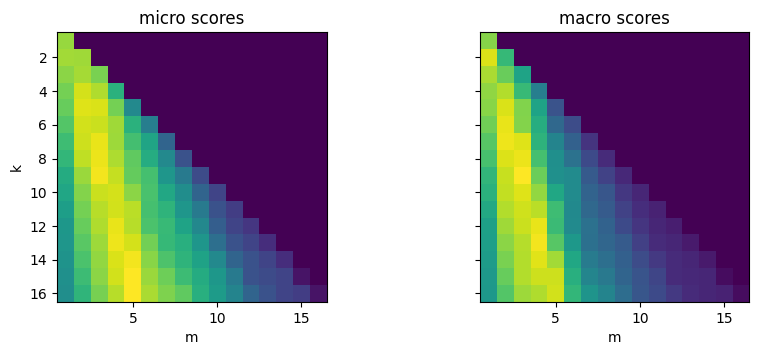

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
ax0.imshow(perf_micro)
ax1.imshow(perf_macro)

ax0.set_title("micro scores")
ax0.set_ylabel("k")
ax1.set_title("macro scores")

for ax in [ax0, ax1]:
  ax.set_xlim([0.5, 17 - 0.5])
  ax.set_ylim([17 - 0.5, 0.5])
  ax.set_xlabel("m")
plt.show();

From the plots choosing a m too small or too large yields poor results for a given k. Let's find the best result overall.

In [ ]:
k, m = np.unravel_index(perf_micro.argmax(), perf_micro.shape)
print(f"Best k: {k}, best m: {m}")

Best k: 15, best m: 5


The performance is best for k=15 and m=5 or get nearest 15 neighbors and assign the labels that occured at least 5 times. Now that we've a good method for finding the best valus for the embedding lookup, we can play the same game as with Naive Bayes classifier where we go throughthe slices of training set and evaluate the performance.

Before we can slice the dataset, we need to remove the index as it can't be sliced like dataset.

In [ ]:
embs_train_with_label_ids.drop_index("embedding")

In [ ]:
test_labels = np.array(embs_test_with_label_ids["label_ids"])
test_queries = np.array(embs_test_with_label_ids["embedding"], dtype=np.float32)

In [ ]:
train_slices

[array([ 0,  2,  9, 11, 18, 19, 45, 52, 54, 92]),
 array([  0,   2,   9,  11,  18,  19,  45,  52,  54,  92,   1,   6,  10,
         12,  41,  56,  63,  88, 110]),
 array([  0,   2,   9,  11,  18,  19,  45,  52,  54,  92,   1,   6,  10,
         12,  41,  56,  63,  88, 110,   3,   4,  14,  16,  22,  28,  40,
         55,  58,  60,  65,  89,  97, 118, 122, 132, 133]),
 array([  0,   2,   9,  11,  18,  19,  45,  52,  54,  92,   1,   6,  10,
         12,  41,  56,  63,  88, 110,   3,   4,  14,  16,  22,  28,  40,
         55,  58,  60,  65,  89,  97, 118, 122, 132, 133,   5,  13,  15,
         20,  23,  25,  27,  30,  31,  33,  35,  36,  44,  57,  64,  69,
         73,  74,  78,  80,  90,  91,  99, 105, 123, 136, 141, 152, 180,
        184, 190, 197]),
 array([  0,   2,   9,  11,  18,  19,  45,  52,  54,  92,   1,   6,  10,
         12,  41,  56,  63,  88, 110,   3,   4,  14,  16,  22,  28,  40,
         55,  58,  60,  65,  89,  97, 118, 122, 132, 133,   5,  13,  15,
         20,  23,  25,

In [ ]:
from collections import defaultdict
macro_scores = defaultdict(list,
             {'Naive Bayes': [0.23288166214995487,
               0.21006897585844955,
               0.24086240556828795,
               0.25730500818220114,
               0.28271105113210376,
               0.27403710305671086],
              'Zero Shot': [0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704],
              'Naive Bayes + Aug': [0.2737711831914731,
               0.25605893981645134,
               0.31979801437456845,
               0.3094434358950488,
               0.32029251106650486,
               0.3923299639243911]})
micro_scores = defaultdict(list,
             {'Naive Bayes': [0.3604651162790698,
               0.30208333333333337,
               0.41081081081081083,
               0.4435483870967742,
               0.5046728971962616,
               0.5346534653465347],
              'Zero Shot': [0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615],
              'Naive Bayes + Aug': [0.3846153846153846,
               0.4019138755980861,
               0.5051546391752577,
               0.45925925925925926,
               0.5021645021645023,
               0.5650224215246638]})

In [ ]:
# train_slice is list of indexes
for train_slice in train_slices:
  embs_train_tmp = embs_train_with_label_ids.select(train_slice)
  # Create a FAISS index from training slice
  embs_train_tmp.add_faiss_index("embedding")

  # Get best k, m values with validation set
  perf_micro, _ = find_best_k_m(
      embs_train_tmp, valid_queries, valid_labels
  )
  k, m = np.unravel_index(perf_micro.argmax(), perf_micro.shape)

  # Get predictions on test set
  _, samples = embs_train_tmp.get_nearest_examples_batch(
      "embedding",
      test_queries,
      k=int(k),
  )
  y_pred = np.array([get_sample_preds(s, m) for s in samples])

  # evaluate predictions
  clf_report = classification_report(
      test_labels,
      y_pred,
      target_names=mlb.classes_,
      zero_division=0,
      output_dict=True,
  )
  macro_scores["Embedding"].append(clf_report["macro avg"]["f1-score"])
  micro_scores["Embedding"].append(clf_report["micro avg"]["f1-score"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
micro_scores, macro_scores

(defaultdict(list,
             {'Naive Bayes': [0.3604651162790698,
               0.30208333333333337,
               0.41081081081081083,
               0.4435483870967742,
               0.5046728971962616,
               0.5346534653465347],
              'Zero Shot': [0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615],
              'Naive Bayes + Aug': [0.3846153846153846,
               0.4019138755980861,
               0.5051546391752577,
               0.45925925925925926,
               0.5021645021645023,
               0.5650224215246638],
              'Embedding': [0.31176470588235294,
               0.32167832167832167,
               0.4316109422492402,
               0.4834123222748815,
               0.5074626865671641,
               0.5185185185185186]}),
 defaultdict(list,
             {'Naive Bayes': [0.23288166214995487

In [ ]:
from collections import defaultdict
micro_scores, macro_scores = (defaultdict(list,
             {'Naive Bayes': [0.3604651162790698,
               0.30208333333333337,
               0.41081081081081083,
               0.4435483870967742,
               0.5046728971962616,
               0.5346534653465347],
              'Zero Shot': [0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615],
              'Naive Bayes + Aug': [0.3846153846153846,
               0.4019138755980861,
               0.5051546391752577,
               0.45925925925925926,
               0.5021645021645023,
               0.5650224215246638],
              'Embedding': [0.31176470588235294,
               0.32167832167832167,
               0.4316109422492402,
               0.4834123222748815,
               0.5074626865671641,
               0.5185185185185186]}),
 defaultdict(list,
             {'Naive Bayes': [0.23288166214995487,
               0.21006897585844955,
               0.24086240556828795,
               0.25730500818220114,
               0.28271105113210376,
               0.27403710305671086],
              'Zero Shot': [0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704],
              'Naive Bayes + Aug': [0.2737711831914731,
               0.25605893981645134,
               0.31979801437456845,
               0.3094434358950488,
               0.32029251106650486,
               0.3923299639243911],
              'Embedding': [0.2335927572655292,
               0.09608708443659901,
               0.27436131670002634,
               0.2980009468399694,
               0.24339086839086838,
               0.2695956794628521]}))

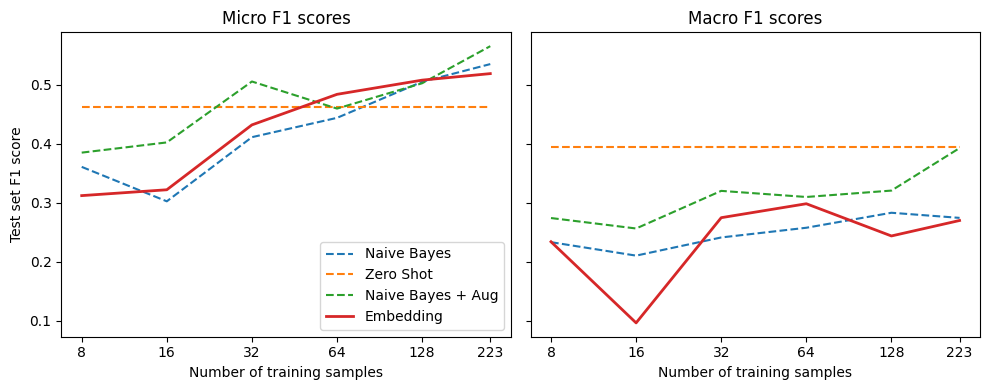

In [ ]:
plot_metrics(
  micro_scores,
  macro_scores,
  train_samples,
  "Embedding",
)

The embedding lookup is competitive on the micro scores with the previous approaches while just having two "learnable" parameters, *k* and *m*, but performs slighlty worse on the macro scores.

Take the results with caution, which method works best strongly depends on the domain. The zero-shot pipeline's training data is quite different from the GitHub issues dataset we're using it on, which contains a lot of code that the model likely has not encountered much better.

Similarly embedding's quality depends on the model and the data it was trained on.

We can just change the checkpoint with different embeddings and compare the results.

Before going to next topic of fine-tuning with transformers let's cover below:

####  Efficient Similarity Search with Faiss

We first encountered FAISS in qa notebook to retrieve documents via DPT embeddings. Let's see how FAISS library works and why it is powerful in ML toolbox.

We are used to performing fast text queries on huge datasets such as Wikipedia or web with search engines such as google. When we move from text to embeddings, we'd like to maintain that performance; however, the methods used to speed up text queries don't apply to embeddings.

To speed up text search we usually create an inverted index that maps terms to documents. An inverted index works like an index at the end of a book: each word is mapped to the pages(or documents in our case) it occurs in. When we later run a query we can quickly look up in which documents the search terms appear. This works with discrete objects such as words, but does not work with continuous objects such as vectors.

One embedding will never be same as another embedding vector. We've to look for similar embeddings and not exact matches. If this is the case we've to compare with all **n** embedding to find the similar embeddings.

When we want to find the most similar vectrors is a database. This is easier for a small dataset but for huge datasets of thousands or millions of entries we need to wait a while for each query to be processed.

FAISS address this with serveral tricks. The main idea is to partition the dataset. If we only need to compare the query embedding to only a subset the performance will be faster but which subset to search and will it guarantee most similar entries? There is better solution K-means.

*k-means*
![alt](https://raw.githubusercontent.com/nlp-with-transformers/notebooks/884293a3ab50071aa2afd1329ecf4a24f0793333//images/chapter09_faiss-index.png)

K-means will cluster the embeddings to clusters and each cluster will have a centroid(average of all memebers). We can compare the query with all centroids to identify the group, then query **n** entries in that group.

This reduces the number of compairsons from *n* to $k + \frac{n}{k}$. What is the correct *k*?
* Too small k will have lots of entries inside the cluster
* Too large k will have lots of centroids to search

$k = \sqrt{n}$ is the optimum k value.

In addition to speeding up queries with partioning, FAISS also allows us to utilize GPUs for a further speed up. If memeory becomes a problem, we can perform quantization schemes.

[Guide for FAISS index](https://github.com/facebookresearch/faiss/wiki/Guidelines-to-choose-an-index).

One of the largest projects to use FAISS was the creation of the
CCMatrix corpus by Facebook. The authors used multilingual
embeddings to find parallel sentences in different languages.
This enormous corpus was subsequently used to train M2M100,
a large machine translation model that is able to directly
translate between any of 100 languages.

### Fine-Tuning a Vanilla Transformer

If we have access to labeled data, we can also try to do the obvious thing: simply fine-tune a pretrained transformer model. In this section, We'll use the standard BERT checkpoint as a starting point. Later, we'll see the effect that fine-tuning the langauage model has on performance.

> **Note:** For many applications, starting with a pretrained BERT-like model is a good idea. However, if the domain of your corpus differs significantly from the pretraining corpus(which is usually wikipedia), we should explore the many models that are available in HuggingFace Hub. Chances are someone has already pretrained a model on our domain.

Let's start by loading the pretrained tokenizer, tokenizing our dataset, and getting rid of the columns we don't need for training and evaluation:

In [ ]:
import torch
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
  return tokenizer(batch["text"], truncation=True, max_length=128,)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [84]:
ds

DatasetDict({
    train: Dataset({
        features: ['label_ids', 'labels', 'text'],
        num_rows: 223
    })
    valid: Dataset({
        features: ['label_ids', 'labels', 'text'],
        num_rows: 106
    })
    test: Dataset({
        features: ['label_ids', 'labels', 'text'],
        num_rows: 111
    })
    unsup: Dataset({
        features: ['label_ids', 'labels', 'text'],
        num_rows: 9303
    })
})

In [85]:
# Encode/Tokenize text
ds_enc = ds.map(tokenize, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

In [86]:
ds_enc

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'input_ids', 'label_ids', 'labels', 'special_tokens_mask', 'text', 'token_type_ids'],
        num_rows: 223
    })
    valid: Dataset({
        features: ['attention_mask', 'input_ids', 'label_ids', 'labels', 'special_tokens_mask', 'text', 'token_type_ids'],
        num_rows: 106
    })
    test: Dataset({
        features: ['attention_mask', 'input_ids', 'label_ids', 'labels', 'special_tokens_mask', 'text', 'token_type_ids'],
        num_rows: 111
    })
    unsup: Dataset({
        features: ['attention_mask', 'input_ids', 'label_ids', 'labels', 'special_tokens_mask', 'text', 'token_type_ids'],
        num_rows: 9303
    })
})

In [87]:
ds_enc = ds_enc.remove_columns(["labels", "text"])

In [88]:
ds_enc

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'input_ids', 'label_ids', 'special_tokens_mask', 'token_type_ids'],
        num_rows: 223
    })
    valid: Dataset({
        features: ['attention_mask', 'input_ids', 'label_ids', 'special_tokens_mask', 'token_type_ids'],
        num_rows: 106
    })
    test: Dataset({
        features: ['attention_mask', 'input_ids', 'label_ids', 'special_tokens_mask', 'token_type_ids'],
        num_rows: 111
    })
    unsup: Dataset({
        features: ['attention_mask', 'input_ids', 'label_ids', 'special_tokens_mask', 'token_type_ids'],
        num_rows: 9303
    })
})

In [ ]:
for feature_name, feature_info in ds_enc["train"].features.items():
  print(feature_name)
  print(feature_info)
  print("")

attention_mask
Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)

input_ids
Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None)

label_ids
Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)

token_type_ids
Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)



In [89]:
ds_enc.set_format("torch")

The multilabel loss function expects the labels to be of type float, since it allows for class probabalities instead of discrete labels.  Hence, we need to change the type of column `label_ids`. Since changing the format of the colum element-wise does not play well with Arrow's typed format., we'll do a little workaround. First, create a new columns with labels. The format of the column is inferred from the first element. Then we delete the original column and rename the new one to take the place of the original one:

In [ ]:
ds_enc["train"][0]['label_ids']

tensor([0, 0, 0, 1, 0, 0, 0, 0, 0])

In [90]:
ds_enc = ds_enc.map(lambda x: {"label_ids_f": x["label_ids"].to(torch.float32)},
                    remove_columns=["label_ids"])
ds_enc = ds_enc.rename_column("label_ids_f", "label_ids")

  0%|          | 0/223 [00:00<?, ?ex/s]

  0%|          | 0/106 [00:00<?, ?ex/s]

  0%|          | 0/111 [00:00<?, ?ex/s]

  0%|          | 0/9303 [00:00<?, ?ex/s]

In [91]:
ds_enc["train"][0]["label_ids"]

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [80]:
# Init training arguments
from transformers import Trainer, TrainingArguments

training_arguments_fine_tune = TrainingArguments(
    output_dir="./results",
    num_train_epochs=20,
    learning_rate=3e-5,
    lr_scheduler_type="constant",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=32,
    weight_decay=0.0,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="micro f1",
    save_total_limit=1,
    log_level="error",
    logging_strategy="epoch",
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


We need the F1-score to choose the best model, so we need to make sure it is calculate during the evaluation. Model returns logits, we'll first normalize the predictions with a sigmoid functino and binarize them with a simple threshold. Then we can return the scores we are interested in from the classification report. Let's put all these in a compute_metrics function to feed the trainer:

In [82]:
from scipy.special import expit as sigmoid

def compute_metrics(pred):
  y_true = pred.label_ids
  y_pred = sigmoid(pred.predictions)
  y_pred = (y_pred>0.5).astype(float)

  clf_dict = classification_report(
      y_true,
      y_pred,
      target_names=all_labels,
      zero_division=0,
      output_dict=True,
  )
  return {
      "micro f1": clf_dict["micro avg"]["f1-score"],
      "macro f1": clf_dict["macro avg"]["f1-score"]
  }

In [ ]:
all_labels

['tokenization',
 'new model',
 'model training',
 'usage',
 'pipeline',
 'tensorflow or tf',
 'pytorch',
 'examples',
 'documentation']

In [ ]:
# Load the config for model
config = AutoConfig.from_pretrained(model_ckpt)
config.num_labels = len(all_labels)
config.problem_type = "multi_label_classification"

In [ ]:
config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "multi_label_classification",
  "transformers_version": "4

In [ ]:
macro_scores, micro_scores

(defaultdict(list,
             {'Naive Bayes': [0.23288166214995487,
               0.21006897585844955,
               0.24086240556828795,
               0.25730500818220114,
               0.28271105113210376,
               0.27403710305671086],
              'Zero Shot': [0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704,
               0.39372541039207704],
              'Naive Bayes + Aug': [0.2737711831914731,
               0.25605893981645134,
               0.31979801437456845,
               0.3094434358950488,
               0.32029251106650486,
               0.3923299639243911],
              'Embedding': [0.2335927572655292,
               0.09608708443659901,
               0.27436131670002634,
               0.2980009468399694,
               0.24339086839086838,
               0.2695956794628521]}),
 defaultdict(list,
             {'Naive Bayes': [0.3604

In [ ]:
from sklearn.metrics import classification_report

for train_slice in train_slices:
    print(f"Number of samples in slice: {len(train_slice)}")
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                               config=config)
    trainer = Trainer(
        model=model, tokenizer=tokenizer,
        args=training_arguments_fine_tune,
        compute_metrics=compute_metrics,
        train_dataset=ds_enc["train"].select(train_slice),
        eval_dataset=ds_enc["valid"],)

    trainer.train()
    pred = trainer.predict(ds_enc["test"])
    metrics = compute_metrics(pred)
    macro_scores["Fine-tune (vanilla)"].append(metrics["macro f1"])
    micro_scores["Fine-tune (vanilla)"].append(metrics["micro f1"])

Number of samples in slice: 10


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.677200,0.600976,0.072464,0.049237
2,0.568100,0.562779,0.000000,0.000000
3,0.548800,0.547875,0.000000,0.000000
4,0.529800,0.520510,0.000000,0.000000
5,0.503300,0.495777,0.000000,0.000000
6,0.481400,0.473592,0.000000,0.000000
7,0.456900,0.447101,0.000000,0.000000
8,0.435800,0.438308,0.000000,0.000000
9,0.404400,0.417570,0.000000,0.000000
10,0.389100,0.407262,0.000000,0.000000


Number of samples in slice: 19


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.609200,0.558726,0.053097,0.011905
2,0.516200,0.480431,0.000000,0.000000
3,0.455000,0.437803,0.000000,0.000000
4,0.410900,0.410873,0.000000,0.000000
5,0.380300,0.399300,0.000000,0.000000
6,0.351800,0.379630,0.000000,0.000000
7,0.336300,0.374999,0.000000,0.000000
8,0.318500,0.368957,0.000000,0.000000
9,0.303600,0.366864,0.000000,0.000000
10,0.281900,0.359195,0.000000,0.000000


Number of samples in slice: 36


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.581200,0.500043,0.000000,0.000000
2,0.450800,0.420980,0.000000,0.000000
3,0.392000,0.385464,0.000000,0.000000
4,0.349300,0.367550,0.000000,0.000000
5,0.323900,0.363199,0.000000,0.000000
6,0.299300,0.356407,0.016529,0.007937
7,0.281600,0.343706,0.000000,0.000000
8,0.260400,0.352956,0.171053,0.048964
9,0.248900,0.342367,0.016529,0.007937
10,0.224400,0.336848,0.212766,0.096642


Number of samples in slice: 68


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.536100,0.431374,0.000000,0.000000
2,0.395900,0.376075,0.000000,0.000000
3,0.355300,0.357338,0.000000,0.000000
4,0.337000,0.344890,0.064516,0.028674
5,0.313900,0.333611,0.000000,0.000000
6,0.282300,0.316987,0.231884,0.098849
7,0.262900,0.311826,0.207407,0.090123
8,0.238300,0.312480,0.356688,0.159214
9,0.214400,0.295367,0.456140,0.171153
10,0.188600,0.283255,0.447059,0.186960


Number of samples in slice: 134


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.458900,0.372504,0.000000,0.000000
2,0.348900,0.344645,0.000000,0.000000
3,0.314600,0.330756,0.242857,0.085859
4,0.289100,0.293081,0.242857,0.087855
5,0.254000,0.279078,0.505882,0.249265
6,0.217200,0.245563,0.571429,0.289559
7,0.186600,0.238841,0.558140,0.308338
8,0.155400,0.216312,0.587571,0.347840
9,0.125500,0.206255,0.627027,0.432135
10,0.106200,0.201327,0.642487,0.452893


Number of samples in slice: 223


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.426600,0.357700,0.000000,0.000000
2,0.330600,0.322879,0.152672,0.063492
3,0.286500,0.284132,0.405229,0.163484
4,0.243000,0.252238,0.532544,0.274136
5,0.206400,0.234593,0.523810,0.241276
6,0.171000,0.220301,0.568306,0.296172
7,0.138700,0.205604,0.670103,0.487592
8,0.114800,0.204791,0.683168,0.576771
9,0.090000,0.212355,0.646766,0.496311
10,0.070600,0.214525,0.643216,0.504865


In [77]:
micro_scores, macro_scores

(defaultdict(list,
             {'Naive Bayes': [0.3604651162790698,
               0.30208333333333337,
               0.41081081081081083,
               0.4435483870967742,
               0.5046728971962616,
               0.5346534653465347],
              'Zero Shot': [0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615,
               0.4615384615384615],
              'Naive Bayes + Aug': [0.3846153846153846,
               0.4019138755980861,
               0.5051546391752577,
               0.45925925925925926,
               0.5021645021645023,
               0.5650224215246638],
              'Embedding': [0.31176470588235294,
               0.32167832167832167,
               0.4316109422492402,
               0.4834123222748815,
               0.5074626865671641,
               0.5185185185185186],
              'Fine-tune (vanilla)': [0.05925925925925926,
           

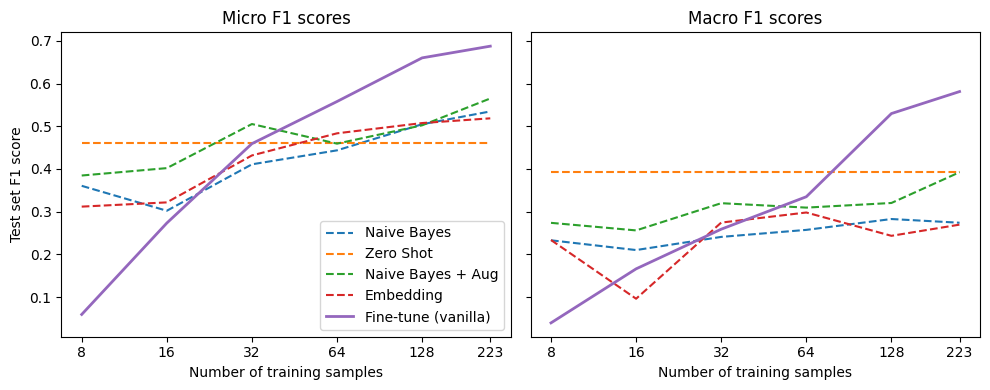

In [ ]:
plot_metrics(micro_scores, macro_scores, train_samples, "Fine-tune (vanilla)")

First of all simply fine-tuning a vanilla BERT model on the dataset leads to competitive results when we have access to around 64 data points.

### In-Context and Few-Shot Learning with Prompts

We saw earlier in this notebook that we can use a language model like BERT or GPT-2 and adapt it to a supervised task by using prompts and parsing the model's token predictions. This doesn't require training task specific head and tuning the model parameters for the task. On negative side we can't leverage labeled data. There is a middle ground that we can sometimes take advantage of called *in-context* or *few-shot learning*.

To illustrate the concept, consider an English to French
translation task. In the zero-shot paradigm, we would construct
a prompt that might look as follows:

```Python
prompt = """\
Translate English to French:
thanks =>
"""
```

This hopefully prompts the model to predict the tokens of the
word “merci”. We already saw when using GPT-2 for
summarization in Chapter 6 that adding “TL;DR” to a text
prompted the model to generate a summary without explicitly
being trained to do this. An interesting finding of the GPT-3
paper was the ability of large language models to effectively
learn from examples presented in the prompt—so, the previous
translation example could be augmented with several English
to German examples, which would make the model perform
much better on this task.
Furthermore, the authors found that the larger the models are
scaled, the better they are at using the in-context examples,
leading to significant performance boosts. Although GPT-3-sized
models are challenging to use in production, this is an exciting
emerging research field and people have built cool applications,
6
such as a natural language shell where commands are entered
in natural language and parsed by GPT-3 to shell commands.
An alternative approach to using labeled data is to create
examples of the prompts and desired predictions and continue
training the language model on these examples. A novel method
called ADAPET uses such an approach and beats GPT-3 on a
wide variety of tasks, tuning the model with generated
prompts. Recent work by Hugging Face researchers suggests
that such an approach can be more data-efficient than finetuning a custom head.
In this section we briefly looked at various ways to make good
use of the few labeled examples that we have. Very often we
also have access to a lot of unlabeled data in addition to the
labeled examples; in the next section we’ll discuss how to make
good use of that.

## Leveraging Unlabeled Data

Although having access to large volumes of high-quality labeled data is the best case scenario to train a classifier, this does not mean that unlabeled data is worthless. Just think about the pretraining models we've used, they're all trained on internet unrelated to the task at hand. But still twe can leverage the pretrained weights on other tasks on a variety of text. This is the core idea of transfer learning in NLP.

Naturally if the pretraining texts has a similar structure as downstream tasks the transfer works better. So if we bring the pretraining task closer to the downstream objective we could potentially improve the transfer.

Let's think about it interms of a concrete exampled: BERT is pretrained on the BookCorpus and English Wikipedia, and text containing code and GitHub issues are definitley a small niche in these datasets. If we pretrained BERT from scratch on crawl of GitHub issues, We'll loose the languaged BERT learned on it's corpus which is valid for GitHub issues. Is there a middle groun between training from scratch and using the model for classification? There is, and it is called domain adaptation. Instead of retrainig the language model from scratchm, we can continue the model training on our domain. In this step we can use the classic language model training objective of predicting masked words, which means we don't need any labeled data. After that we can load the adapted model as a classifier and fine-tune it, thus leveraging the unlabeled data.

Pretrained BERT -> Domain Adaptation(Corpus pretraining with MLM objective) -> Classification Head.

The beauty of domain adaptation is that compared to labeled data, unlabeled data is often abundantly available. Furthermore, the adatpted model can be reused for many use cases.  Imagine you want to build an email classifier and apply domain adaptation on all your historic emails. You can later use the same model for named entity recognition or another classification task like sentiment analysis, since the approach isagnostic to the downstream task.

### Fine-Tuning a Language Model

In this section we'll fine tune the pretrained BERT model with MLM on the unlabeled portion of our dataset. To do this we only need two new concepts: an extra step when tokenizing the data and a special collator. Let's start with tokenization.

The tokenizer adds special tokens [CLS] and [SEP] for sentence classification, these tokens doesn't need to be learned. When we do masked language modeling..., To make sure we don't train and predict these tokens, we can use `return_specail_tokens_mask=True`. This'll mask the loss for these tokens.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [63]:
def tokenize(batch):
    return tokenizer(batch["text"], truncation=True,
                     max_length=128, return_special_tokens_mask=True)

In [64]:
ds_mlm = ds.map(tokenize, batched=True)
ds_mlm = ds_mlm.remove_columns(["labels", "text", "label_ids"])

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

What's missing to start masked language modeling is the mechanism to mask tokens in the input sequence and have the target tokens in the outputs. One way we can do is mask tokens randomnly and add the label for these sequences. This will double the size of dataset, as we'll have masked sequences plus original sequences. The same masking will also be used in every epoch.

A much more elegant solution is to use a data collator. Rememeber that the data collator is the function that builds the bridge between the dataset and the model calls. There are different types of collators for padding, token classification etc. The data collator `DataCollatorForLanguageModeling` will perform masking and label generation on the fly. We initialize it with model's tokenizer and the fraction of tokens we want to mask via the `mlm_probability`.

In [65]:
from transformers import DataCollatorForLanguageModeling, set_seed
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm_probability=0.15,
)

In [66]:
data_collator

DataCollatorForLanguageModeling(tokenizer=PreTrainedTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}), mlm=True, mlm_probability=0.15, pad_to_multiple_of=None, tf_experimental_compile=False, return_tensors='pt')

In [67]:
# Let's write some code to see collator in action
set_seed(3)
data_collator.return_tensors = "np"
inputs = tokenizer("Transformers are awesome!", return_tensors="np")
outputs = data_collator([{"input_ids": inputs["input_ids"][0]}])

original_input_ids = inputs['input_ids'][0]
masked_input_ids = outputs['input_ids'][0]

In [68]:
pd.DataFrame({
    "Original tokens": tokenizer.convert_ids_to_tokens(original_input_ids),
    "Masked tokens": tokenizer.convert_ids_to_tokens(masked_input_ids),
    "Original input_ids": original_input_ids,
    "Masked input_ids": masked_input_ids,
    "Labels": outputs["labels"][0]}).T


,0,1,2,3,4,5
Original tokens,[CLS],transformers,are,awesome,!,[SEP]
Masked tokens,[CLS],transformers,are,awesome,[MASK],[SEP]
Original input_ids,101,19081,2024,12476,999,102
Masked input_ids,101,19081,2024,12476,103,102
Labels,-100,-100,-100,-100,999,-100


All tokens except [MASK] are assigned -100 label to exclude them from loss calculation.

In [69]:
# Switch back collator to pt
data_collator.return_tensors = "pt"

Alright, now we've tokenizer and collator. Let's initialize TrainingArguments for Fine-tune masked language model.

In [70]:
from transformers import AutoModelForMaskedLM
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
  output_dir = f"{model_ckpt}-issues-128",
  per_device_train_batch_size=32,
  logging_strategy="epoch",
  evaluation_strategy="epoch",
  save_strategy="no",
  num_train_epochs=16,
  push_to_hub=True,
  report_to="none"
)

PyTorch: setting up devices


In [55]:
from huggingface_hub import login
login()

In [60]:
ds_mlm = ds_mlm.remove_columns(["labels", "text", "label_ids"])

In [71]:
trainer = Trainer(
  model=AutoModelForMaskedLM.from_pretrained("bert-base-uncased"),
  tokenizer=tokenizer,
  args=training_args,
  data_collator=data_collator,
  train_dataset=ds_mlm["unsup"],
  eval_dataset=ds_mlm["train"],
)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.16.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-uncased/re

In [72]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: special_tokens_mask.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 9303
  Num Epochs = 16
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4656


Epoch,Training Loss,Validation Loss
1,2.099100,1.692431
2,1.639800,1.429310
3,1.487800,1.389865
4,1.399500,1.381368
5,1.341300,1.198607
6,1.280200,1.275058
7,1.239400,1.261013
8,1.199300,1.211842
9,1.165500,1.188235
10,1.140600,1.222520


The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: special_tokens_mask.
***** Running Evaluation *****
  Num examples = 223
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: special_tokens_mask.
***** Running Evaluation *****
  Num examples = 223
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: special_tokens_mask.
***** Running Evaluation *****
  Num examples = 223
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: special_tokens_mask.
***** Running Evaluation *****
  Num examples = 223
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward

Epoch,Training Loss,Validation Loss
1,2.099100,1.692431
2,1.639800,1.429310
3,1.487800,1.389865
4,1.399500,1.381368
5,1.341300,1.198607
6,1.280200,1.275058
7,1.239400,1.261013
8,1.199300,1.211842
9,1.165500,1.188235
10,1.140600,1.222520


The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: special_tokens_mask.
***** Running Evaluation *****
  Num examples = 223
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: special_tokens_mask.
***** Running Evaluation *****
  Num examples = 223
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: special_tokens_mask.
***** Running Evaluation *****
  Num examples = 223
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: special_tokens_mask.
***** Running Evaluation *****
  Num examples = 223
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForMaskedLM.forward

TrainOutput(global_step=4656, training_loss=1.2816876742438352, metrics={'train_runtime': 3801.519, 'train_samples_per_second': 39.155, 'train_steps_per_second': 1.225, 'total_flos': 9794377493913600.0, 'train_loss': 1.2816876742438352, 'epoch': 16.0})

In [73]:
trainer.push_to_hub("Training complete!")

Saving model checkpoint to bert-base-uncased-issues-128
Configuration saved in bert-base-uncased-issues-128/config.json
Model weights saved in bert-base-uncased-issues-128/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-issues-128/tokenizer_config.json
Special tokens file saved in bert-base-uncased-issues-128/special_tokens_map.json


Upload file pytorch_model.bin:   0%|          | 1.00/418M [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/3.37k [00:00<?, ?B/s]

To https://huggingface.co/JpChi/bert-base-uncased-issues-128
   f2a1382..eeacab1  main -> main

   f2a1382..eeacab1  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Masked Language Modeling', 'type': 'fill-mask'}}
To https://huggingface.co/JpChi/bert-base-uncased-issues-128
   eeacab1..dbd03ab  main -> main

   eeacab1..dbd03ab  main -> main



'https://huggingface.co/JpChi/bert-base-uncased-issues-128/commit/eeacab1ccafbe2650cd602b1263e4e0bae0767aa'

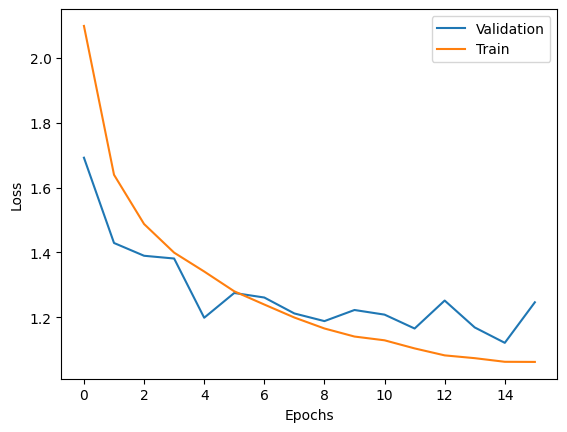

In [74]:
df_log = pd.DataFrame(trainer.state.log_history)

(df_log.dropna(subset=["eval_loss"]).reset_index()["eval_loss"]
 .plot(label="Validation"))
df_log.dropna(subset=["loss"]).reset_index()["loss"].plot(label="Train")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [93]:
from sklearn.metrics import classification_report

model_ckpt = "JpChi/bert-base-uncased-issues-128"
config = AutoConfig.from_pretrained(model_ckpt)
config.num_labels = len(all_labels)
config.problem_type = "multi_label_classification"

for train_slice in train_slices:
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                               config=config)
    trainer = Trainer(
        model=model,
        tokenizer=tokenizer,
        args=training_arguments_fine_tune,
        compute_metrics=compute_metrics,
        train_dataset=ds_enc["train"].select(train_slice),
        eval_dataset=ds_enc["valid"],
    )

    trainer.train()
    pred = trainer.predict(ds_enc['test'])
    metrics = compute_metrics(pred)
    # DA refers to domain adaptation
    macro_scores['Fine-tune (DA)'].append(metrics['macro f1'])
    micro_scores['Fine-tune (DA)'].append(metrics['micro f1'])

Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.695500,0.590414,0.000000,0.000000
2,0.536200,0.497844,0.000000,0.000000
3,0.452100,0.448033,0.000000,0.000000
4,0.395100,0.415397,0.000000,0.000000
5,0.352800,0.396979,0.000000,0.000000
6,0.334500,0.385842,0.000000,0.000000
7,0.317800,0.378857,0.000000,0.000000
8,0.294200,0.373812,0.000000,0.000000
9,0.277100,0.369771,0.000000,0.000000
10,0.264000,0.365604,0.000000,0.000000


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.613600,0.512329,0.000000,0.000000
2,0.452700,0.423939,0.000000,0.000000
3,0.376700,0.387776,0.000000,0.000000
4,0.336700,0.371372,0.000000,0.000000
5,0.316600,0.361001,0.000000,0.000000
6,0.293000,0.353821,0.000000,0.000000
7,0.269100,0.349483,0.000000,0.000000
8,0.246700,0.344201,0.000000,0.000000
9,0.229200,0.339775,0.016529,0.008889
10,0.209300,0.336808,0.079365,0.038588


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.554500,0.436808,0.000000,0.000000
2,0.383300,0.376015,0.000000,0.000000
3,0.335300,0.359321,0.000000,0.000000
4,0.303300,0.347944,0.000000,0.000000
5,0.277600,0.336670,0.048780,0.024691
6,0.245900,0.326627,0.180451,0.075838
7,0.218100,0.320826,0.194030,0.080009
8,0.191100,0.315620,0.277778,0.113981
9,0.172800,0.312970,0.312925,0.144713
10,0.153900,0.313026,0.310811,0.144713


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.491800,0.379865,0.000000,0.000000
2,0.355800,0.351174,0.000000,0.000000
3,0.319600,0.328073,0.095238,0.044444
4,0.284500,0.311802,0.271429,0.108943
5,0.244800,0.291306,0.429448,0.166063
6,0.203800,0.275400,0.455090,0.172984
7,0.172000,0.266227,0.466258,0.247006
8,0.144400,0.258021,0.475610,0.250154
9,0.121400,0.260623,0.481928,0.249942
10,0.105300,0.250041,0.493976,0.276352


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.424800,0.352387,0.000000,0.000000
2,0.327400,0.315798,0.246377,0.089947
3,0.279500,0.294103,0.350649,0.123324
4,0.234100,0.246569,0.512195,0.261989
5,0.183000,0.229118,0.586207,0.355604
6,0.137900,0.209906,0.631016,0.456023
7,0.105000,0.198428,0.656250,0.489901
8,0.084300,0.201207,0.637838,0.473378
9,0.068600,0.185738,0.680412,0.541351
10,0.058500,0.186428,0.683938,0.541538


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.397300,0.330453,0.235294,0.088889
2,0.300900,0.291406,0.285714,0.101010
3,0.246700,0.229119,0.573099,0.321133
4,0.178000,0.197469,0.655914,0.501451
5,0.126200,0.188629,0.673684,0.583434
6,0.090100,0.172805,0.707692,0.640362
7,0.067400,0.157649,0.741463,0.684870
8,0.052800,0.159721,0.720000,0.662344
9,0.044400,0.176338,0.718750,0.635989
10,0.036100,0.154121,0.777251,0.731610


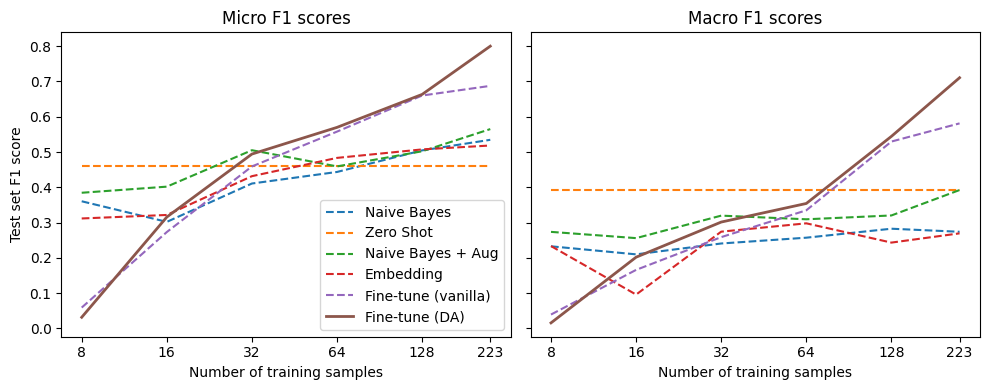

In [96]:
plot_metrics(micro_scores, macro_scores, train_samples, "Fine-tune (DA)")